<a href="https://colab.research.google.com/github/veronica1013/Test-for-Hypothyroidism/blob/main/Moringa_Data_Science_Core_Module2_W8_Independent_Project_2021_10_Veronica_Isiaho_Python_Notebook_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test for Hypothyroidism

### 1.0 Defining the Question

### a) Specifying the Question

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. I will se the healthcare datasets provided to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### b) Defining the Metric for Success
A model that will accurately predict whether or not the patient's symptoms indicate that the patient has hypothyroid which are:
1.A boosted decision tree model with accuracy score of above 90 %
2.A support Vector Machine model with accuracy score of above 90 %


#### Hypothesis
Null Hypothesis: Patient's symptoms doesn't indicate that the patient has hypothyroid. 

Alternate Hypothesis:Patient's symptoms indicate that the patient has hypothyroid.
 


#### Significance level
The significance level is set at alpha = 0.05

### c) Understanding the context 
Hypothyroidism: (Underactive Thyroid) idicates too Little Thyroid Hormone. Hypothyroidism is a condition in which the thyroid gland is not able to produce enough thyroid hormone. Since the main purpose of thyroid hormone is to "run the body's metabolism," it is understandable that people with this condition will have symptoms associated with a slow metabolism.

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients.I will therefore use the healthcare datasets provided to accomplish the following objective:

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

Details of the columns in the dataset are as listed below:
1. Age
2. Sex
3. on_thyroxine
4. query_on_thyroxine
5. on_antithyroid_medicationthyroid_surgery
6. query_hypothyroid
7. query_hyperthyroid
8. pregnant
9. sick
10. tumor
11. lithium
12. goitre
13. TSH_measured
14. TSH
15. T3_measured
16. T3
17. TT4_measured
18. TT4

### d) Recording the Experimental Design
The experimental design will be as listed below:
1. Loading the data
2. Understanding the data
3. Decision Trees:
> Random Forest
> Ada Boosted Trees
> Gradient boosted Trees
4. Data Cleaning
4. Perform univariate, bivariate and multivariate analysis
5. Perform regression analysis (polynomial, rbf kernel function)
> Polynomial
> Multiple Linear Regression
> rbf kernel function
> Build SVM model
> Evaluate performance and pick the kernel that performs the best

*   Quantile Regression
*   Ridge Regression
*   Lasso Regression
*   Elastic Net Regression
6. Check for Multicollinearity
7. Provide a recommendation based on the analysis
8. Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test
9. Challenge the solution by providing insights on how to make improvements in model by:

**N/B:** After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version

### e) Data Relevance

The data that was provided is suitable for prediction as to whether patient symptoms indicates hypothyroidism or not.

### External Data Source Validation

### a.Validation
Performed a validation with the National Center for Biotechnology information. More information is found on this [link](https://www.ncbi.nlm.nih.gov/books/NBK544274/).

### 1.1 Importing the libraries

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#### 1.1.1 Loading the Data

The dataset and glossary to use for this project can be found here [link](http://bit.ly/hypothyroid_data).

In [ ]:
# Loading the data 
url = "http://bit.ly/hypothyroid_data"
data_df= pd.read_csv(url)


#### 1.1.2 Checking the Data

In [ ]:
# Preview first rows
data_df.head(2)

status age sex on_thyroxine  ... FTI_measured FTI TBG_measured TBG
0  hypothyroid  72   M            f  ...            y  10            n   ?
1  hypothyroid  15   F            t  ...            y  17            n   ?

[2 rows x 26 columns]

In [ ]:
# Preview last rows
data_df.tail(2)

status age sex on_thyroxine  ... FTI_measured  FTI TBG_measured TBG
3161  negative  74   F            f  ...            y  137            n   ?
3162  negative  56   F            t  ...            y  143            n   ?

[2 rows x 26 columns]

In [ ]:
# Check the shape
data_df.shape

(3163, 26)

In [ ]:
# Ckeck column names
data_df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [ ]:
# Check the data types
data_df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [ ]:
# Check if there are any missing values
data_df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [ ]:
# Check duplicates if any in the dataset
data_df.duplicated().sum()

77

In [ ]:
# Confirm the 3 duplicates
duplicate = data_df[data_df.duplicated()]
duplicate

status age sex on_thyroxine  ... FTI_measured  FTI TBG_measured TBG
53    hypothyroid  69   F            f  ...            y   61            n   ?
66    hypothyroid  62   M            f  ...            y   10            n   ?
124   hypothyroid  77   F            f  ...            y   49            n   ?
128   hypothyroid  79   F            f  ...            y   48            n   ?
131   hypothyroid  50   F            t  ...            y   60            n   ?
...           ...  ..  ..          ...  ...          ...  ...          ...  ..
3048     negative  28   M            f  ...            y  103            n   ?
3055     negative  33   F            f  ...            y   86            n   ?
3066     negative  74   F            t  ...            y  107            n   ?
3111     negative  89   M            f  ...            y  103            n   ?
3151     negative  58   F            f  ...            y  108            n   ?

[77 rows x 26 columns]

It is evident that the data is not similar. Thus decided to keep them.

In [ ]:
# Check the statistics of the dataset
data_df.describe()

status   age   sex on_thyroxine  ... FTI_measured   FTI TBG_measured   TBG
count       3163  3163  3163         3163  ...         3163  3163         3163  3163
unique         2    93     3            2  ...            2   281            2    53
top     negative     ?     F            f  ...            y     ?            n     ?
freq        3012   446  2182         2702  ...         2916   247         2903  2903

[4 rows x 26 columns]

In [ ]:
# Check the
column_names = ['status', 'age', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
value = '?'
missing_values = data_df[['status', 'age', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']].values=='?'
missing_values 
   
                             

array([[False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True],
       ...,
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True]])

In [ ]:
# replace the '?' with 0 so that I could do label encoding for descision trees analysis
data_df = data_df.replace('?', '0')
data_df.describe()

# From the describe function, it is evident that the '?' values have all been replaced

status   age   sex on_thyroxine  ... FTI_measured   FTI TBG_measured   TBG
count       3163  3163  3163         3163  ...         3163  3163         3163  3163
unique         2    93     3            2  ...            2   280            2    52
top     negative     0     F            f  ...            y     0            n     0
freq        3012   446  2182         2702  ...         2916   256         2903  2904

[4 rows x 26 columns]

In [ ]:
# Coverting data for continuous variables from string to numeric then label encode
# categorical data for decision trees analysis
data_df[['age','TSH','T3','TT4','T4U','FTI','TBG']] = data_df[['age','TSH','T3','TT4','T4U','FTI','TBG']].apply(pd.to_numeric)
data_df.dtypes

status                        object
age                            int64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

### 2.0 Decision Trees Classification Analysis

#### 2.0.1 Label Encoding Categorical Variables for Decision Trees Analysis

In [ ]:
# Create a copy of the original dataset before label encoding
encoding_df = data_df.copy(deep=True)
encoding_df.head(1)

# Label encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# Categorical boolean mask
categorical_feature_mask = encoding_df.dtypes==object

# Filter categorical columns using mask and turn it into a list
categorical_features = encoding_df.columns[categorical_feature_mask].tolist()
categorical_features

['status',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'thyroid_surgery',
 'query_hypothyroid',
 'query_hyperthyroid',
 'pregnant',
 'sick',
 'tumor',
 'lithium',
 'goitre',
 'TSH_measured',
 'T3_measured',
 'TT4_measured',
 'T4U_measured',
 'FTI_measured',
 'TBG_measured']

In [ ]:
encoding_df['sex'].unique()

array(['M', 'F', '0'], dtype=object)

In [ ]:
# Check the shape of the encoding dataframe
encoding_df.shape

(3163, 26)

In [ ]:
# Check the length of the categorical variables
len(categorical_features)

19

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode Categorical variables
encoding_df['status']= label_encoder.fit_transform(encoding_df['status'])
encoding_df['sex']= label_encoder.fit_transform(encoding_df['sex'])
encoding_df['on_thyroxine']= label_encoder.fit_transform(encoding_df['on_thyroxine'])
encoding_df['query_on_thyroxine']= label_encoder.fit_transform(encoding_df['query_on_thyroxine'])
encoding_df['on_antithyroid_medication']= label_encoder.fit_transform(encoding_df['on_antithyroid_medication'])
encoding_df['thyroid_surgery']= label_encoder.fit_transform(encoding_df['thyroid_surgery'])
encoding_df['query_hypothyroid']= label_encoder.fit_transform(encoding_df['query_hypothyroid'])
encoding_df['query_hyperthyroid']= label_encoder.fit_transform(encoding_df['query_hyperthyroid'])  
encoding_df['pregnant']= label_encoder.fit_transform(encoding_df['pregnant'])
encoding_df['sick']= label_encoder.fit_transform(encoding_df['sick'])
encoding_df['tumor']= label_encoder.fit_transform(encoding_df['tumor'])
encoding_df['lithium']= label_encoder.fit_transform(encoding_df['lithium'])
encoding_df['goitre']= label_encoder.fit_transform(encoding_df['goitre'])
encoding_df['TSH_measured']= label_encoder.fit_transform(encoding_df['TSH_measured'])
encoding_df['T3_measured']= label_encoder.fit_transform(encoding_df['T3_measured'])
encoding_df['TT4_measured']= label_encoder.fit_transform(encoding_df['TT4_measured'])
encoding_df['T4U_measured']= label_encoder.fit_transform(encoding_df['T4U_measured'])
encoding_df['FTI_measured']= label_encoder.fit_transform(encoding_df['FTI_measured'])
encoding_df['TBG_measured']= label_encoder.fit_transform(encoding_df['TBG_measured'])


In [ ]:
#encoding_df['TSH']= label_encoder.fit_transform(encoding_df['TSH'])
#encoding_df['T3']= label_encoder.fit_transform(encoding_df['T3'])
#encoding_df['TT4']= label_encoder.fit_transform(encoding_df['TT4'])
#encoding_df['T4U']= label_encoder.fit_transform(encoding_df['T4U'])
#encoding_df['FTI']= label_encoder.fit_transform(encoding_df['FTI'])
#encoding_df['TBG']= label_encoder.fit_transform(encoding_df['TBG'])
#encoding_df['age']= label_encoder.fit_transform(encoding_df['age'])

encoding_df = encoding_df.apply(label_encoder.fit_transform)

In [ ]:
# Confirm the dataframe has been encoded
encoding_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   status                     3163 non-null   int64
 1   age                        3163 non-null   int64
 2   sex                        3163 non-null   int64
 3   on_thyroxine               3163 non-null   int64
 4   query_on_thyroxine         3163 non-null   int64
 5   on_antithyroid_medication  3163 non-null   int64
 6   thyroid_surgery            3163 non-null   int64
 7   query_hypothyroid          3163 non-null   int64
 8   query_hyperthyroid         3163 non-null   int64
 9   pregnant                   3163 non-null   int64
 10  sick                       3163 non-null   int64
 11  tumor                      3163 non-null   int64
 12  lithium                    3163 non-null   int64
 13  goitre                     3163 non-null   int64
 14  TSH_measured            

In [ ]:
# Predict whether or not the the patient's symptoms indicate that the patient has hypothyroid.
# y label will be the status variable because it indicates whether a patient has Hypothyroid or not. 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Check for the unique values on encoded status column
status = encoding_df['status'].unique()
print(f"The unique values in the encoded status variable are: {status}")

# Check for the unique values on the original status column
status_2 = data_df['status'].unique()
print(f"\nWhile the unique values for the status variable in the original dataframe are:")
for i in status_2:
  print(i.title())

print("\nTherefore 0 in the encoded status variable represents Hypothyroid and 1 represent Negative(No Hypothyroidism)")

# Choose the test features.
# I will start with the categorical variables first then continuous variables
# After feature measurement for the two (categorical and continous variables), we will then combine
# them and see how accurate our predictive variable will be
# I will start with all the categorical features and reduce them further 
# until I obtain an optimal accuracy for our predictive model
test_features = ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication',
                 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid',
                 'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured',
                 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']

y = encoding_df['status'].values
X = encoding_df[test_features].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

The unique values in the encoded status variable are: [0 1]

While the unique values for the status variable in the original dataframe are:
Hypothyroid
Negative

Therefore 0 in the encoded status variable represents Hypothyroid and 1 represent Negative(No Hypothyroidism)


Next I will create a decision tree classifier model and determine its accuracy with having considered all the categorical variables

#### 2.0.2 Decision Trees Classification Analysis

In [ ]:
# Create a decision tree classifier
tree = DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=5, 
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model I've trained
y_pred = tree.predict(X_test)


from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("With a min_samples_leaf=1, I obtained an accuracy of 100%. This is good evidence for overfitting."
"\nI further increased the minimum samples leaf to 3 and finally to 5 and obtained an accuracy percentage of 95.89% ")

Accuracy: 0.9589257503949447
With a min_samples_leaf=1, I obtained an accuracy of 100%. This is good evidence for overfitting.
I further increased the minimum samples leaf to 3 and finally to 5 and obtained an accuracy percentage of 95.89% 


After increasing the min_samples_leaf to 3, the accuracy still remained the same. I further increased it to 5 and obtained an accuarcy of 95.89% which isn't that bad. I will leave it at that point and visualize the decision tree on the graph. I will thereafter consider the all the continuous variables.

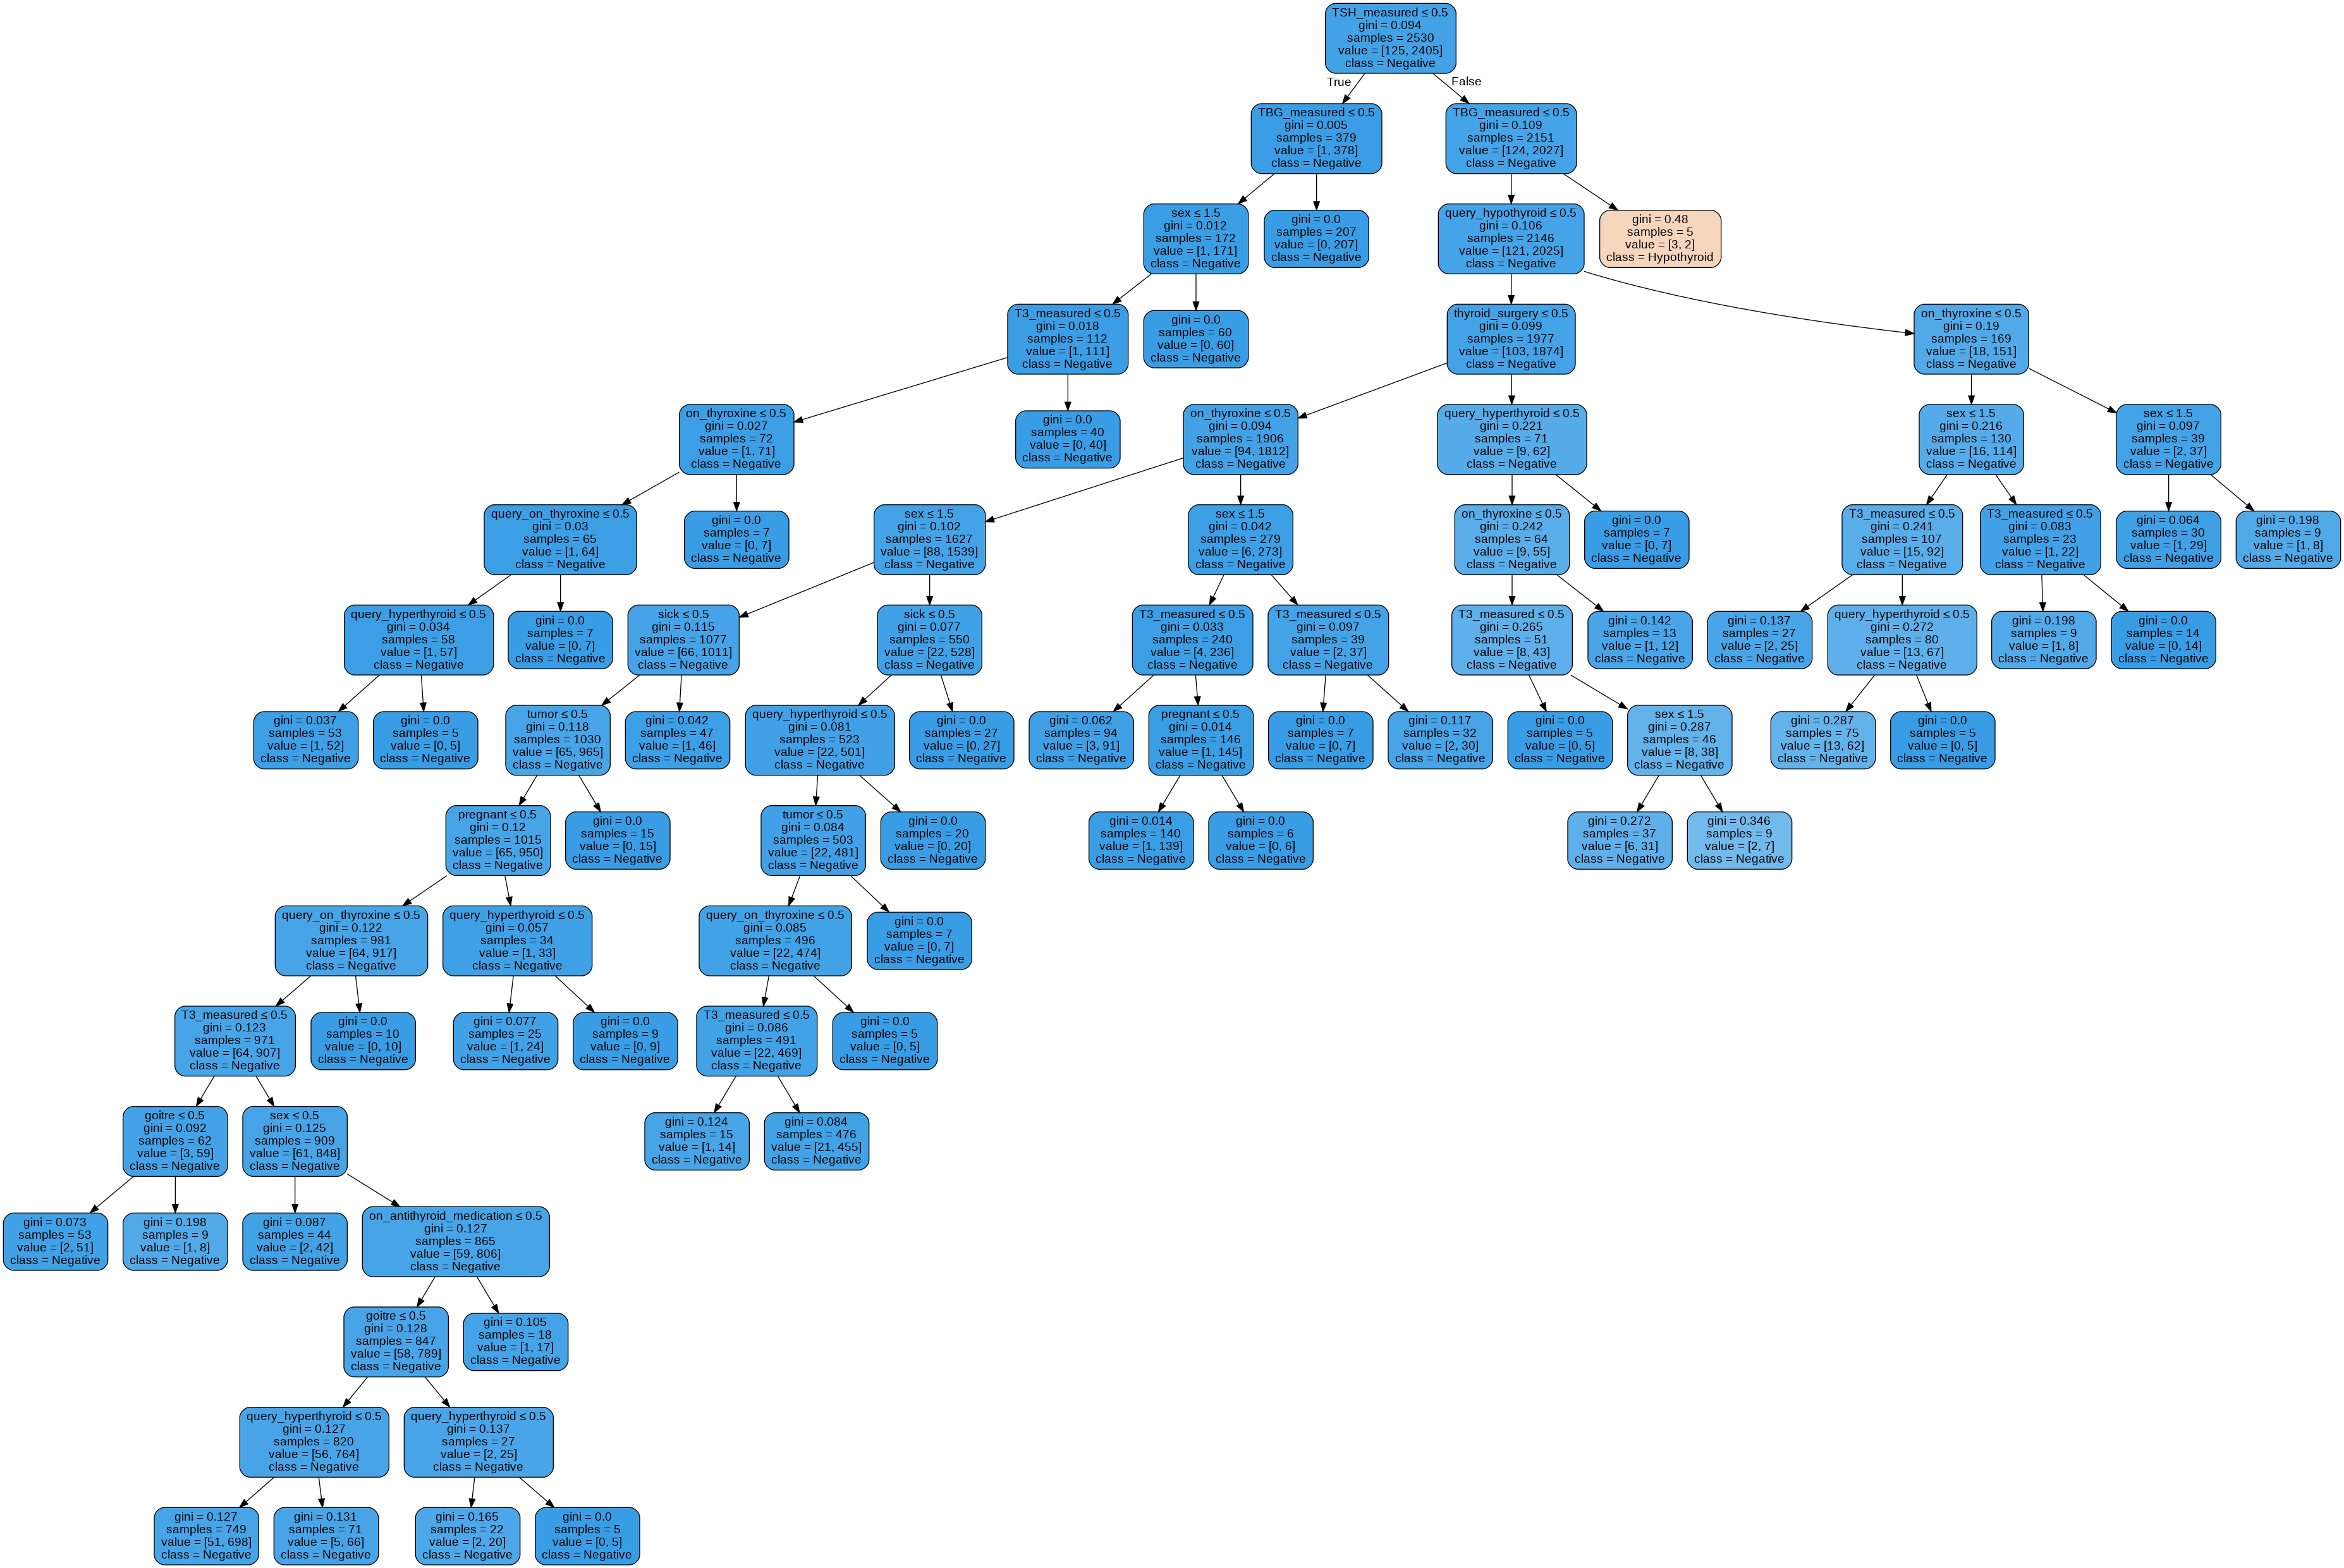

In [ ]:
# plot the decision tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus


dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, filled=True, rounded=True,
                special_characters=True,feature_names = test_features,
                class_names=['Hypothyroid', 'Negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidism_status.png')
Image(graph.create_png())

From the above decision tree, all the features plotted do not determine whther a patient has hypothyroid. This is because nearly all the root nodes had a class of negative. implying the patients do not have thyroid. The variables that do not determine whether a patient has thyroid or not are:
1. Query on thyroxine
2. Query on hyperthyroid
3. T3 Measured
4. On thyroxine
5. Sick
6. TSH Measured
7. TBG Measured
8. Thyroid surgery
9. sex

However, there's only one class with a hypothyroid class. this is the only factor in determining hypothyroidism in patients. this is the sex variable but the effect on hypothyroid status is very minimal. Out of a sample of 5 patient's, which 3 of them are women as per the root node on the furthest left with sex < 1.5, gini=0.012, samples=172, value=[1,171] and a class of negative, a true value of 3 women were proven to have hypothyroidism with a gini value of 0.48 and a sample of 5. Two of those women tested negative for hypothyroidism.

We will preview ths sex variable to confirm the encoded values are as shown above.

In [ ]:
# Preview the sex details from the original dataframe
print(f"The sex details from the original dataframe are: {data_df['sex'].unique()}")

print(f"While the sex details from the encoded dataframe are: {encoding_df['sex'].unique()}")

print("Therefore, values of < 1.5 from the decision tree on the sex variable "
"\nimplies that from a sample size of 5, 3 females had hypothyroidism "
"\nwhile 2 did not as indicated, having a value of [3,2] on the decision tree above "
"and with a root node class = hypothyroid.")


The sex details from the original dataframe are: ['M' 'F' '0']
While the sex details from the encoded dataframe are: [2 1 0]
Therefore, values of < 1.5 from the decision tree on the sex variable 
implies that from a sample size of 5, 3 females had hypothyroidism 
while 2 did not as indicated, having a value of [3,2] on the decision tree above and with a root node class = hypothyroid.



Gini index < 0.2 represents perfect equality, 0.2–0.3 relative equality, 0.3–0.4 adequate equality, 0.4–0.5 big gap, and above 0.5 represents severe gap. Therefore, the warning level of Gini index is 0.4. Having a gini value of 0.48 from the decision tree on the hypothyrodism class shows that there was a big gap in equality. This is true as shown in the sex tree, out of the 172 samples, only one had hypothyroidism while the rest (171) didn't have hypothyroidism. A gini value of 0.012 shows that this is a strong occurence.

However, despite including all the categorical variables, there's no information on the rest of the variables. This might imply that sex plays a very minimal role in determining if a patient has hypothyroidism or not. However, I will review the continous variables as well then determine the features with high values after doing the gradient boost regression and clasification analysis and thereafter make a comparison.

### 2.1 Decision Trees Regression Analysis

In [ ]:
# Check the simple statistics for the continuous variables
data_df.describe()

age          TSH  ...          FTI          TBG
count  3163.000000  3163.000000  ...  3163.000000  3163.000000
mean     43.941195     5.046782  ...   106.386310     2.571483
std      25.235169    22.160083  ...    65.607474    10.204298
min       0.000000     0.000000  ...     0.000000     0.000000
25%      27.000000     0.000000  ...    85.000000     0.000000
50%      48.000000     0.400000  ...   105.000000     0.000000
75%      64.000000     1.800000  ...   126.000000     0.000000
max      98.000000   530.000000  ...   881.000000   122.000000

[8 rows x 7 columns]

In [ ]:
# Preview the columns
data_df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [ ]:
# Predict hit target of an employee, based on their attendance record
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# y label is the status variable from the encoded dataframe (encoding_df) to enable calculate RMSE
# but all the x lables are from the original dataframe (data_df)
y = encoding_df['status'].values

# select the test features
test_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

# X variables
X = data_df[test_features].values

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Create a decision tree regressor model

tree = DecisionTreeRegressor()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model I've trained
y_pred = tree.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

Actual   Predicted
count  949.000000  949.000000
mean     0.958904    0.955743
std      0.198617    0.205774
min      0.000000    0.000000
25%      1.000000    1.000000
50%      1.000000    1.000000
75%      1.000000    1.000000
max      1.000000    1.000000

The prediction looks extremely close to the test data. Let's see what the metrics says.

In [ ]:
# check the RMSE of our prediction model
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.020021074815595362
Mean Squared Error: 0.020021074815595362
Root Mean Squared Error: 0.14149584734399578


The RMSE of 0.1415 indicates that the predicted data points will lie closely to the line of best fir thus having a low residual value.

In [ ]:
# Retrain the model by Creating a decision tree classifier with a maximum depth of 5 and min_samples_split of 30
tree = DecisionTreeRegressor(min_samples_split = 30, max_depth=5)

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

Actual   Predicted
count  949.000000  949.000000
mean     0.958904    0.956010
std      0.198617    0.194524
min      0.000000    0.000000
25%      1.000000    1.000000
50%      1.000000    1.000000
75%      1.000000    1.000000
max      1.000000    1.000000

In [ ]:
# Let's check the RMSE of the retrained prediction model
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.018199407344289546
Mean Squared Error: 0.013944572487157572
Root Mean Squared Error: 0.11808713938087234


With no maximum depth and min_samples_leaf dfined, the RMSE was Root Mean Squared Error: 0.1415. After considering a maximum depth of 5 and min_samples_leaf of 30, the RMSE score didn't change much. It was Root Mean Squared Error: 0.1181. A difference of 0.0214. That is so insignificant. From the two models it means that the standard deviation residuals of our predicted model very low thus the data is highly concentrated near the line of best fit. We will therefore visualize the retrained model.

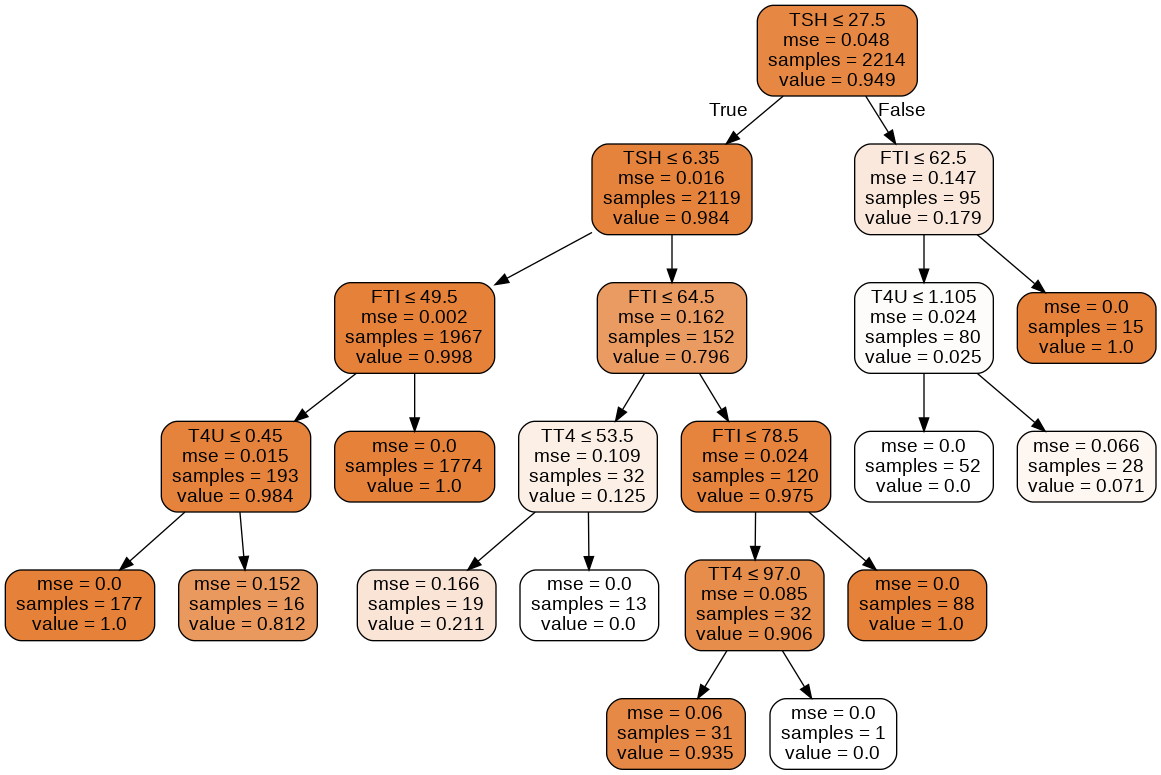

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidism_status.png')
Image(graph.create_png())

From the regresiion analysis, only a few variables have an impact on determining whether a patient has thyroid or not. These variables are:
1. TSH
2. FTI
3. TT4
4. T4U


I will train the model again but this time include only those variables that were featured on both decision trees (classification and regression models). this time round I will add the sex variable.

In [ ]:
# Predict hit target of an employee, based on their attendance record
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# y label is the status variable from the encoded dataframe (encoding_df) to enable calculate RMSE
# but all the x lables are from the original dataframe (data_df)
y = encoding_df['status'].values

# select the test features
test_features = ['TSH','FTI', 'T4U', 'TT4', 'T3']

# X variables
X = encoding_df[test_features].values

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Create a decision tree regressor model

tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=30)

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model I've trained
y_pred = tree.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

Actual   Predicted
count  949.000000  949.000000
mean     0.958904    0.951697
std      0.198617    0.190942
min      0.000000    0.000000
25%      1.000000    1.000000
50%      1.000000    1.000000
75%      1.000000    1.000000
max      1.000000    1.000000

In [ ]:
# Let's check the RMSE of the retrained prediction model
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.02196009595974451
Mean Squared Error: 0.012410428583164275
Root Mean Squared Error: 0.11140210313618085


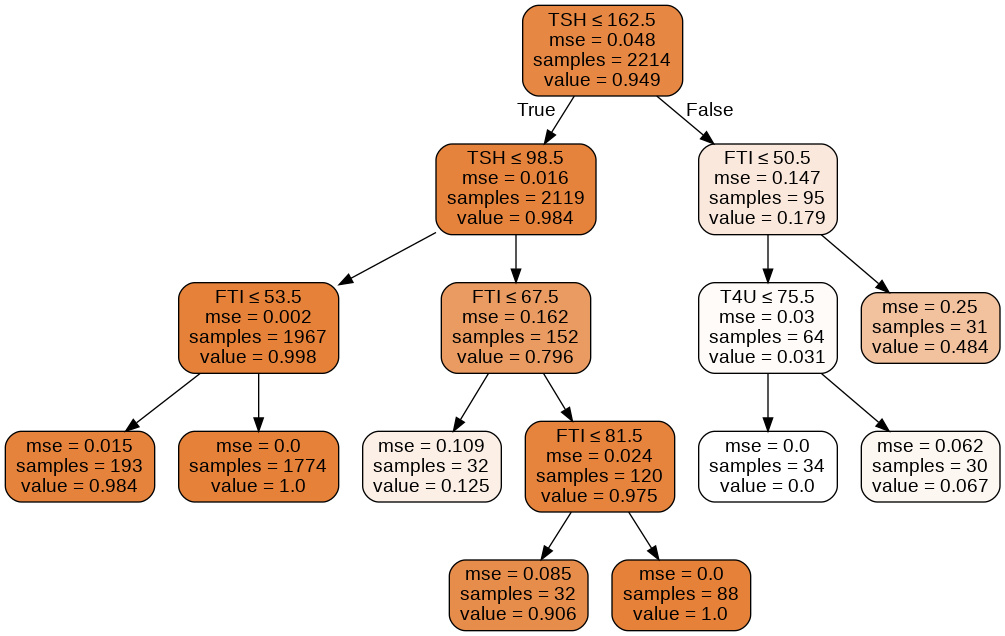

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidism_status.png')
Image(graph.create_png())

After considering the variables that could determine if a patient has thyroid from the classification and regression models which were TSH,FTI, T4U, TT4 and T3, the above diagram indicates that only TSH and FTI are the most determinants of whether a patient has thyroid or not. 

I will further perform feature importance of all the variables and find out if these four variables (TSH, FTI, T4U, TT4 and T3) are the most determinant factors.

### 2.3 Decision Tree Classifier including all independent variables

In [ ]:
#importing required liraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Split the independent and dependent variables
# Predict the whether or not the patient's symptoms determine hypothyroidism 
y = encoding_df['status'].values

test_features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']
X = encoding_df[test_features].values

# Splitting Dataset into 70% Train set and 30% Test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Fitting the variables into the classifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

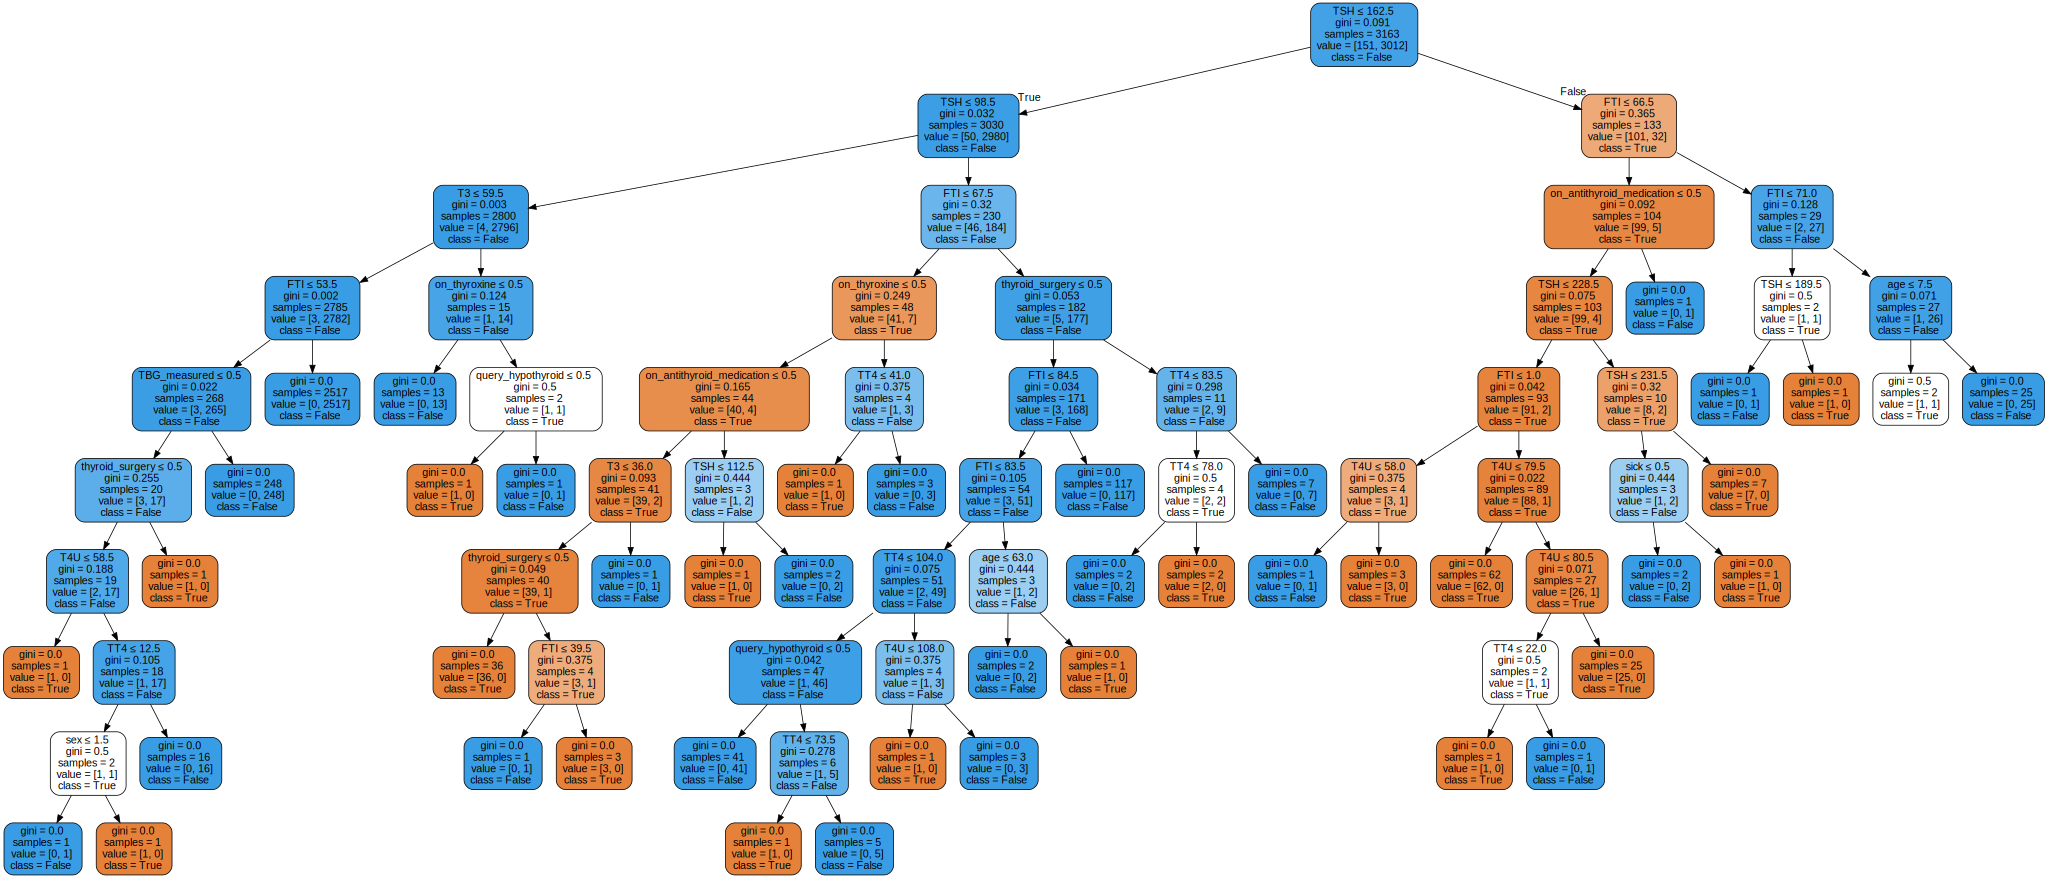

In [ ]:
#visualizing the tree
import matplotlib.pyplot as plt
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None,feature_names = test_features,
                class_names=['True', 'False'],
                filled=True, rounded=True,
                special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

In [ ]:
# Predict based on the model we've trained
y_pred = clf.predict(X_test)

# Create a decision tree classifier
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

Actual   Predicted
count  949.000000  949.000000
mean     0.958904    0.952582
std      0.198617    0.212644
min      0.000000    0.000000
25%      1.000000    1.000000
50%      1.000000    1.000000
75%      1.000000    1.000000
max      1.000000    1.000000

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.01685985247629083
Mean Squared Error: 0.01685985247629083
Root Mean Squared Error: 0.1298454946322391


In [ ]:
from sklearn import metrics
# Model Accuracy, checks how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9831401475237092


In [ ]:
print('The accuracy of Random Forest')
random_forest = "Accuracy: {}%".format(int(round((metrics.accuracy_score(y_test, y_pred)) * 100)))
print(random_forest)

The accuracy of Random Forest
Accuracy: 98%


In [ ]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.01), ('sex', 0.0), ('on_thyroxine', 0.01), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.02), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.61), ('T3_measured', 0.0), ('T3', 0.01), ('TT4_measured', 0.0), ('TT4', 0.01), ('T4U_measured', 0.0), ('T4U', 0.03), ('FTI_measured', 0.0), ('FTI', 0.29), ('TBG_measured', 0.0), ('TBG', 0.0)]

Variable: TSH                  Importance: 0.61
Variable: FTI                  Importance: 0.29
Variable: T4U                  Importance: 0.03
Variable: on_antithyroid_medication Importance: 0.02
Variable: age                  Importance: 0.01
Variable: on_thyroxine         Importance: 0.01
Variable: T3                   Importance: 0.01
Variable: TT4                  Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Var

TypeError: ignored

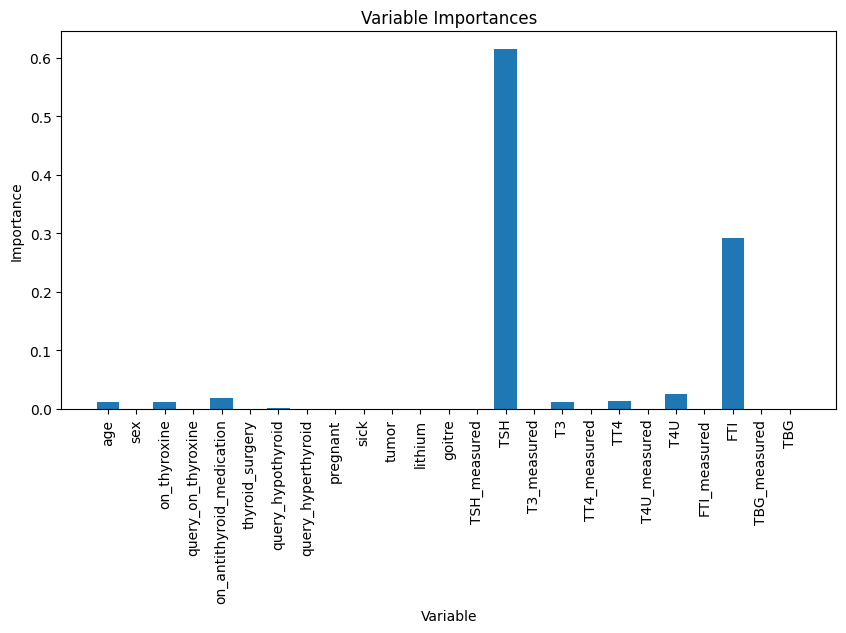

In [ ]:
# Visualize the feature importance
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(10,5),dpi=100)
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

#visuallising the through a bar chart
plt.bar(x=importances['Column Name'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

The grapth above shows very well the order of feature importance. The first one is TSH, FTI,T4U, TT4, T3, on antithyroid medication, age and finally on thyroxine.

### 2.4 Random Forest Classifier

In [ ]:
# Make a copy of the original dataframe
rfc_df = data_df.copy(deep=True)
rfc_df.describe()
rfc_df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [ ]:
# Choosing x and y features
x = rfc_df.iloc[:, 1:]
y = rfc_df['status']

In [ ]:
#encoding my categorical varibales in x  with get dummies method

# Get dummies
x = pd.get_dummies(x, prefix_sep='_', drop_first=True)
#  Preview the x head
x.head()

age    TSH   T3  ...  T4U_measured_y  FTI_measured_y  TBG_measured_y
0   72   30.0  0.6  ...               1               1               0
1   15  145.0  1.7  ...               1               1               0
2   24    0.0  0.2  ...               1               1               0
3   24  430.0  0.4  ...               1               1               0
4   77    7.3  1.2  ...               1               1               0

[5 rows x 26 columns]

In [ ]:
# Encoding categorical features in y 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#Reshaping y to be vertical in-order to see wether the values have changed to numerical
print(y.reshape(len(y),1))

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


In [ ]:
# splitting the dataset into the training set and the test set 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

In [ ]:
#standardizing my data in-order to ensure that the data in internally consistent
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
# Training the Random Forest classfication model on the training set 
from sklearn.ensemble import RandomForestClassifier
# changing the crieterion to entropy to measure the quality of the model
classifer = RandomForestClassifier(criterion='entropy', random_state=50)  
classifer.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [ ]:
# Predicting the test set results
y_pred = classifer.predict(x_test)

#Making the Confusion Matrix
#The confusion matrix will show us the number of correct predictions and the number of incorrect predictions
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred) # the confusion matrix is evaluated in the test set 
print(cm)
print(accuracy_score(y_test, y_pred)) # to get the accuracy of the test set predictions

[[ 37   8]
 [  1 903]]
0.9905163329820864


The above confusion matrix shows that there's  99.05% of 37 and 903 True predictions while only 8 and 1 false predictions.

In [ ]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.009483667017913594
Mean Squared Error: 0.009483667017913594
Root Mean Squared Error: 0.09738412097417933


In [ ]:
#checking for the most important features in our dataset 
#The importances are obtained similarly as before – stored to a data frame which is then sorted by the importance:
importances = pd.DataFrame(data={
    'Column Name': x.columns,
    'Importance': classifer.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

                    Column Name  Importance
1                           TSH    0.300847
5                           FTI    0.261263
3                           TT4    0.199247
4                           T4U    0.064032
2                            T3    0.039144
20               TSH_measured_y    0.028723
0                           age    0.026716
6                           TBG    0.011658
22               TT4_measured_y    0.008484
21                T3_measured_y    0.006608
13          query_hypothyroid_t    0.006555
23               T4U_measured_y    0.006397
11  on_antithyroid_medication_t    0.006055
9                on_thyroxine_t    0.005952
24               FTI_measured_y    0.005829
12            thyroid_surgery_t    0.005827
25               TBG_measured_y    0.004391
8                         sex_M    0.003995
7                         sex_F    0.002768
16                       sick_t    0.001879
19                     goitre_t    0.001705
14         query_hyperthyroid_t 

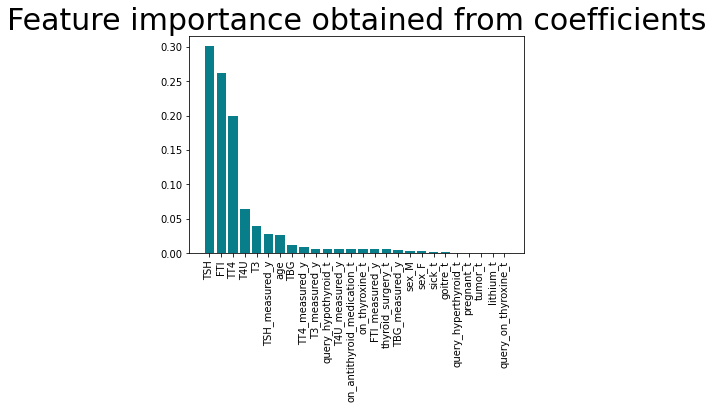

In [ ]:
#visuallising the through a bar chart
plt.bar(x=importances['Column Name'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importance obtained from coefficients', size=30)
plt.xticks(rotation='vertical')
plt.show()


From the above graph we can see that the below features don't have high importance in regards to determining if the patient has hypothyroidism or not:
 1. lithium_t
 2. pregnant_t
 3. tumor_t
 4. query_on_thyroxine_t
 5. query_hyperthyroid_t
 6. goitre_t
 7. sick_t
 8. sex_M
 9. sex_F
 10. fti_measured_y
 11. tbg_measured_y

We will now create another model but without including all the features above and also remove all other features that suggest a patient is on thyroid medication or has had thyroid surgery because they will be biased in our model.

#### 2.4.1 Training the model again using Random Forest Classifier
while considering the features with importance and excluding all those features that indicate a patient is already on thyroid treatment

In [ ]:
# Choosing x and y features
x = rfc_df.iloc[:, 1:]
y = rfc_df['status']

In [ ]:
# Encoding categorical varibales only in x  with get dummies method

# Get dummies
x = pd.get_dummies(x, prefix_sep='_', drop_first=True)
#  Preview the x head
x.head()

age    TSH   T3  ...  T4U_measured_y  FTI_measured_y  TBG_measured_y
0   72   30.0  0.6  ...               1               1               0
1   15  145.0  1.7  ...               1               1               0
2   24    0.0  0.2  ...               1               1               0
3   24  430.0  0.4  ...               1               1               0
4   77    7.3  1.2  ...               1               1               0

[5 rows x 26 columns]

In [ ]:
x.columns

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG', 'sex_F', 'sex_M',
       'on_thyroxine_t', 'query_on_thyroxine_t', 'on_antithyroid_medication_t',
       'thyroid_surgery_t', 'query_hypothyroid_t', 'query_hyperthyroid_t',
       'pregnant_t', 'sick_t', 'tumor_t', 'lithium_t', 'goitre_t',
       'TSH_measured_y', 'T3_measured_y', 'TT4_measured_y', 'T4U_measured_y',
       'FTI_measured_y', 'TBG_measured_y'],
      dtype='object')

In [ ]:
# choosing my matrix of features x and the y
x = x[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG', 'sex_F', 'sex_M',
       'pregnant_t', 'sick_t', 'tumor_t', 'lithium_t', 'goitre_t',
       'TSH_measured_y', 'T3_measured_y', 'TT4_measured_y', 'T4U_measured_y',
       'FTI_measured_y', 'TBG_measured_y']]
y = y

In [ ]:
# Encoding my categroical features in y 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# splitting the dataset into the training set and the test set 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

In [ ]:
#standardizing my data in-order to ensure that the data in internally consistent
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
# Training the Random Forest classfication model on the training set 
from sklearn.ensemble import RandomForestClassifier
# changing the crieterion to entropy to measure the quality of the model
classifer = RandomForestClassifier(criterion='entropy', random_state=50)  
classifer.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [ ]:
# Predicting the test set results
y_pred = classifer.predict(x_test)

#Making the Confusion Matrix
#The confusion matrix will show us the number of correct predictions and the number of incorrect predictions
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred) # the confusion matrix is evaluated in the test set 
print(cm)
print(accuracy_score(y_test, y_pred)) # to get the accuracy of the test set predictions

[[ 36   9]
 [  1 903]]
0.9894625922023182


In [ ]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.01053740779768177
Mean Squared Error: 0.01053740779768177
Root Mean Squared Error: 0.10265187673726073


In [ ]:
# Checking for the most important features in our dataset 
# The importances are obtained similarly as before – stored to a data frame which is then sorted by the importance:
importances = pd.DataFrame(data={
    'Column Name': x.columns,
    'Importance': classifer.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

       Column Name  Importance
1              TSH    0.351499
5              FTI    0.285669
3              TT4    0.157713
4              T4U    0.059187
2               T3    0.039167
0              age    0.033400
14  TSH_measured_y    0.021596
16  TT4_measured_y    0.012814
17  T4U_measured_y    0.009708
6              TBG    0.005652
15   T3_measured_y    0.005525
7            sex_F    0.004126
18  FTI_measured_y    0.003861
8            sex_M    0.003840
13        goitre_t    0.002537
19  TBG_measured_y    0.001797
10          sick_t    0.001345
9       pregnant_t    0.000434
12       lithium_t    0.000077
11         tumor_t    0.000053


#### 2.4.2 Visualizing the 30th tree in the forest

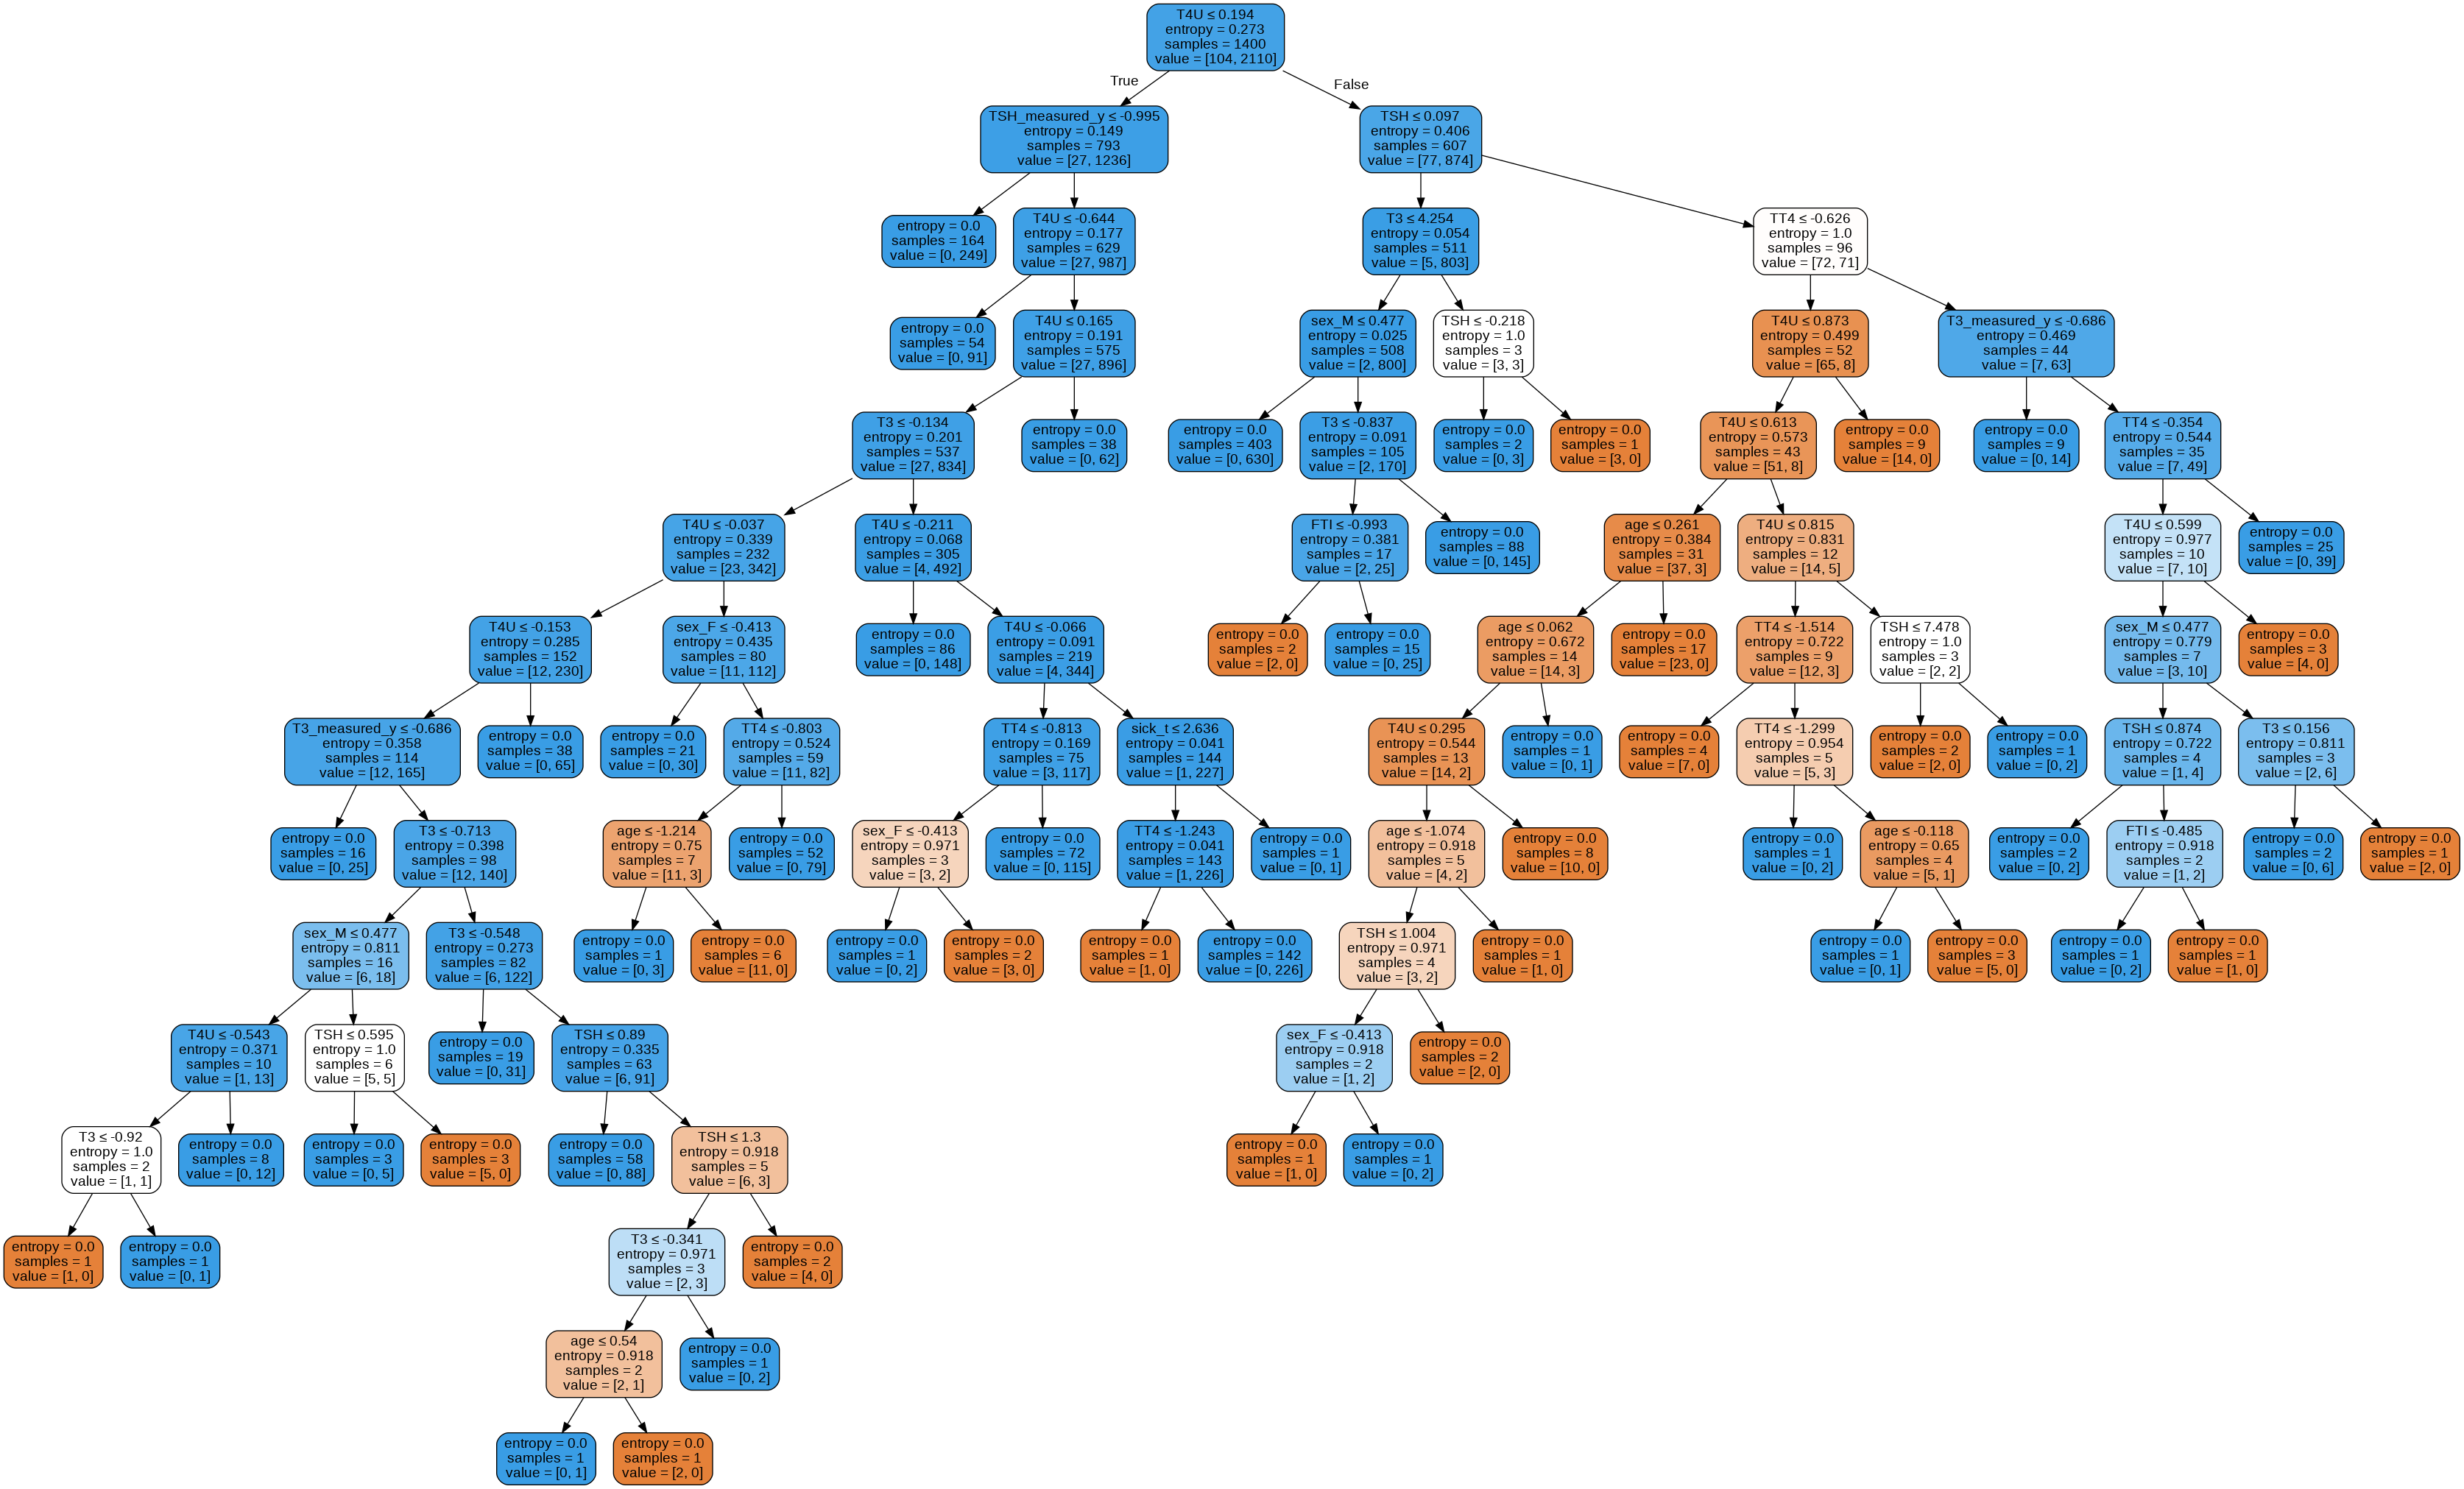

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus


# pick a specific tree from the forest
tree = classifer.estimators_[30]
dot_data = StringIO()

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

We will not make a conclusion yet but perform AdaBoosted Trees and later gradient boosted Trees to see what results we will achieve. 

### 2.5 Performing AdaBoosted Trees using Adaboosted Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Make a copy of the dataframe
boost_df = data_df.copy(deep=True)

#getting the matrix of features x
x = boost_df.drop('status', axis = 1)
y = boost_df['status']

#encoding my categorical varibales in x  with get dummies method

# Get dummies
x = pd.get_dummies(x, prefix_sep='_', drop_first=True)
# X head
x.head()

#encoding my categroical features in y 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#splitting into training set and test set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)

# Making the Confusion Matrix and getting the accuracy of the model
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = ada.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[ 41   4]
 [  4 900]]
0.9915700737618546


#### 2.5.0.1 Performing AdaBoosted Tress having n_estimators=300, learning_rate=1

In [ ]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test

In [ ]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=300, learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

adaboost = "{}%".format(int(round((metrics.accuracy_score(y_test, y_pred)) * 100)))
print(f"\nThe accuracy of Adaboost is: {adaboost}")

Accuracy: 0.9863013698630136

The accuracy of Adaboost is: 99%


#### 2.5.0.2 Adaboosted trees when the learning rate is changed to 3

In [ ]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=300, learning_rate=3)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

adaboost = "{}%".format(int(round((metrics.accuracy_score(y_test, y_pred)) * 100)))
print(f"\nThe accuracy of Adaboost is: {adaboost}")

Accuracy: 0.04952581664910432

The accuracy of Adaboost is: 5%


From the above results, the performance of the prediction reduce drastically when the learning rate is changed to 3. However, the learning rate should be between 0 to 1. so this is evident enough that it can't be higher than 1. so we will reduce it to 0.7 and gauge the accuracy.

#### 2.5.0.3 Adaboosted Trees when the learning rate is changed to 0.7

In [ ]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=300, learning_rate=0.7)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

adaboost = "{}%".format(int(round((metrics.accuracy_score(y_test, y_pred)) * 100)))
print(f"\nThe accuracy of Adaboost is: {adaboost}")

Accuracy: 0.9873551106427819

The accuracy of Adaboost is: 99%


#### 2.5.0.4 Adaboosted Trees with a learning rate of 0.2

In [ ]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=300, learning_rate=0.2)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

adaboost = "{}%".format(int(round((metrics.accuracy_score(y_test, y_pred)) * 100)))
print(f"\nThe accuracy of Adaboost is: {adaboost}")

Accuracy: 0.9905163329820864

The accuracy of Adaboost is: 99%


A learning rate that is too large can cause the model to converge too quickly to a suboptimal solution, whereas a learning rate that is too small can cause the process to get stuck. Therefore a learning rate of 0.7 isn't a bad one for this model. We will train our model with the Adaboosted Regressor and see what results we have.

### 2.5.1 Performing Adaboost Regressor

In [ ]:
data_df.head(2)

status  age sex on_thyroxine  ... FTI_measured   FTI TBG_measured  TBG
0  hypothyroid   72   M            f  ...            y  10.0            n  0.0
1  hypothyroid   15   F            t  ...            y  17.0            n  0.0

[2 rows x 26 columns]

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=1,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

age   TSH   T3   TT4   T4U    FTI  TBG  status  Predicted + status
0  51.0   0.0  1.8  77.0  0.40  193.0  0.0       1            0.977922
1  49.0   0.0  2.0  99.0  0.89  111.0  0.0       1            0.977922
2  22.0   0.0  1.7  82.0  0.72  114.0  0.0       1            0.977922
3  57.0  24.0  1.3  52.0  0.79   66.0  0.0       1            0.338279
4   0.0  13.3  2.5  68.0  1.03   66.0  0.0       1            0.885600

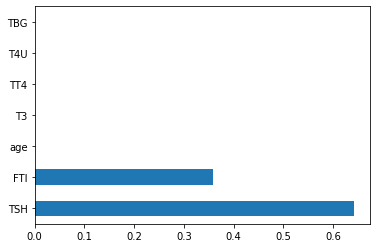

In [ ]:
# Create a copy of the original dataframe
abr_df = data_df.copy(deep=True)
abr_df.head(1)

#X = abr_df[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']]
#y = encoding_df['status']

#encoding the categroical features in y 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#Separate Target Variable and Predictor Variables
TargetVariable= 'status'
Predictors=['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
X=abr_df[Predictors].values
y=encoding_df[TargetVariable].values
 
#Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Adaboost Regression in Libraries
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
 
# Choosing Decision Tree with 1 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=1)
RegModel = AdaBoostRegressor(n_estimators=300, base_estimator=DTR ,learning_rate=1)
 
# Printing all the parameters of Adaboost
print(RegModel)
 
# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)
 
# Measuring Goodness of fit in Training data
from sklearn import metrics
print(f"R2 Value: {metrics.r2_score(y_train, AB.predict(X_train))}")
 
#Measuring accuracy on Testing Data
print(f"Accuracy {100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100)}")
 
#Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
 
#Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[(f"Predicted + {TargetVariable}")]=prediction
TestingDataResults.head()

It is evident from the Adaboost regressor ,model that TSH and FTI have are the most determinant factors for hypothyroidism.

#### 2.5.1.1 AdaBoost Regressor model when max_depth is increased to 5
Let's increase the depth and see what happens.

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=5,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

age   TSH   T3   TT4   T4U    FTI  TBG  status  Predicted + status
0  51.0   0.0  1.8  77.0  0.40  193.0  0.0       1            1.000000
1  49.0   0.0  2.0  99.0  0.89  111.0  0.0       1            1.000000
2  22.0   0.0  1.7  82.0  0.72  114.0  0.0       1            1.000000
3  57.0  24.0  1.3  52.0  0.79   66.0  0.0       1            0.538462
4   0.0  13.3  2.5  68.0  1.03   66.0  0.0       1            0.901099

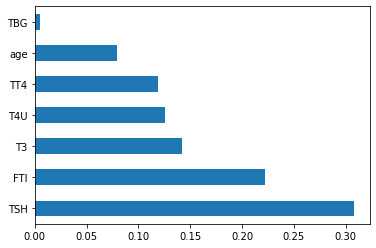

In [ ]:
# Choosing Decision Tree with 5 level 
DTR=DecisionTreeRegressor(max_depth=5)
RegModel = AdaBoostRegressor(n_estimators=300, base_estimator=DTR ,learning_rate=1)
 
# Printing all the parameters of Adaboost
print(RegModel)
 
# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)
 
# Measuring Goodness of fit in Training data
from sklearn import metrics
print(f"R2 Value: {metrics.r2_score(y_train, AB.predict(X_train))}")
 
#Measuring accuracy on Testing Data
print(f"Accuracy {100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100)}")
 
#Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
 
#Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[(f"Predicted + {TargetVariable}")]=prediction
TestingDataResults.head()

When the maximum depth is increased to 5, the values of the predictor variables increases as shown in the figure above. TSH becomes the highest determinant at 31% in determining whether a patient has hypothyroid or not. followed by FTI at 23%, T3 at 14%, T4U at 12%, TT4 at 11%, age at 8% and lastly TBG at around 1%.

Next we will look at the predictor variables using gradient boost. We will use the same variables as those of Adaboosted Trees- Regressor Model for clear comparison.

### 2.5.2 Gradient Boosted Trees

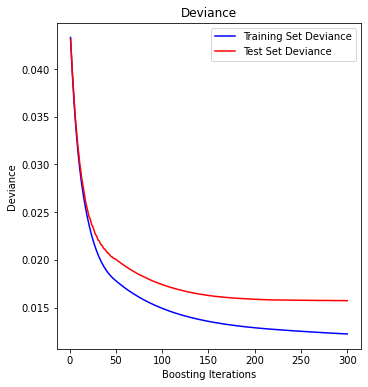

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# First create a copy of the original dataframe
gbtrees_df = data_df.copy(deep=True)

#getting the matrix of features x
X = gbtrees_df.drop('status', axis = 1)
y = gbtrees_df['status']

#encoding the categroical features in y 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#Separate Target Variable and Predictor Variables
TargetVariable = 'status'
Predictors = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
X = gbtrees_df[Predictors].values
y = encoding_df[TargetVariable].values

# Splitting into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

from sklearn.ensemble import GradientBoostingRegressor
target_number_of_trees = 300

boost = GradientBoostingRegressor(n_estimators=target_number_of_trees, learning_rate=0.05, max_depth=1)
boost = boost.fit(X_train, y_train)

y_pred_boost = boost.predict(X)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
# the train_score_ variable is a list that records the deviance of the model for any given number of trees. gbr.train_score_[0] is the deviance when we only had the initial tree, whereas
# gbr.train_score_[100] is the deviance by the time we have created 100 trees.
# This is plotted against a simple list that goes from 1 to our target number of trees.
plt.plot(np.arange(target_number_of_trees) + 1, boost.train_score_, 'b-',
         label='Training Set Deviance')

# We also want to see how well we could handle the test set each time. 
# The staged_predict function takes an X, and returns a list of the predictions for X at various stages of the training: What did we pick when we had 1 tree, 2 trees, 3 trees, etc.
# We will compare our predictions at each stage against the test data, and compute the deviance
test_score = np.zeros((target_number_of_trees,), dtype=np.float64) # this is just a list of 0s

for i, y_pred in enumerate(boost.staged_predict(X_test)):
    # For each prediction, compute the loss function comparing the actual data with your prediction at a given stage of training
    test_score[i] = boost.loss_(y_test, y_pred)
    
plt.plot(np.arange(target_number_of_trees) + 1, test_score, 'r-',
         label='Test Set Deviance')

plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.show()

Let' alter the maximum depth to 2 and see what happens.

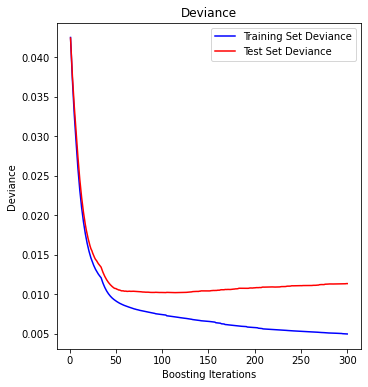

In [ ]:
# Alter the max_depth to
boost = GradientBoostingRegressor(n_estimators=target_number_of_trees, learning_rate=0.05, max_depth=2)
boost = boost.fit(X_train, y_train)

y_pred_boost1 = boost.predict(X)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
# the train_score_ variable is a list that records the deviance of the model for any given number of trees. gbr.train_score_[0] is the deviance when we only had the initial tree, whereas
# gbr.train_score_[100] is the deviance by the time we have created 100 trees.
# This is plotted against a simple list that goes from 1 to our target number of trees.
plt.plot(np.arange(target_number_of_trees) + 1, boost.train_score_, 'b-',
         label='Training Set Deviance')

# We also want to see how well we could handle the test set each time. 
# The staged_predict function takes an X, and returns a list of the predictions for X at various stages of the training: What did we pick when we had 1 tree, 2 trees, 3 trees, etc.
# We will compare our predictions at each stage against the test data, and compute the deviance
test_score = np.zeros((target_number_of_trees,), dtype=np.float64) # this is just a list of 0s

for i, y_pred in enumerate(boost.staged_predict(X_test)):
    # For each prediction, compute the loss function comparing the actual data with your prediction at a given stage of training
    test_score[i] = boost.loss_(y_test, y_pred)
    
plt.plot(np.arange(target_number_of_trees) + 1, test_score, 'r-',
         label='Test Set Deviance')

plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.show()

Alterring the maximum depth to 4

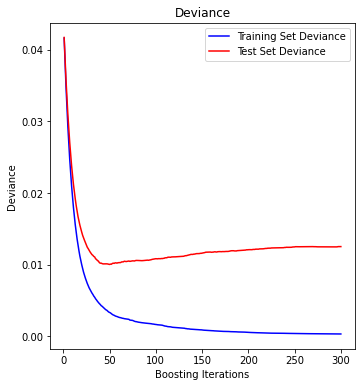

In [ ]:
boost = GradientBoostingRegressor(n_estimators=target_number_of_trees, learning_rate=0.05, max_depth=4)
boost = boost.fit(X_train, y_train)

y_pred_boost = boost.predict(X)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
# the train_score_ variable is a list that records the deviance of the model for any given number of trees. gbr.train_score_[0] is the deviance when we only had the initial tree, whereas
# gbr.train_score_[100] is the deviance by the time we have created 100 trees.
# This is plotted against a simple list that goes from 1 to our target number of trees.
plt.plot(np.arange(target_number_of_trees) + 1, boost.train_score_, 'b-',
         label='Training Set Deviance')

# We also want to see how well we could handle the test set each time. 
# The staged_predict function takes an X, and returns a list of the predictions for X at various stages of the training: What did we pick when we had 1 tree, 2 trees, 3 trees, etc.
# We will compare our predictions at each stage against the test data, and compute the deviance
test_score = np.zeros((target_number_of_trees,), dtype=np.float64) # this is just a list of 0s

for i, y_pred in enumerate(boost.staged_predict(X_test)):
    # For each prediction, compute the loss function comparing the actual data with your prediction at a given stage of training
    test_score[i] = boost.loss_(y_test, y_pred)
    
plt.plot(np.arange(target_number_of_trees) + 1, test_score, 'r-',
         label='Test Set Deviance')

plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.show()

Adjusting max_depth to 4 and learning rate to 1

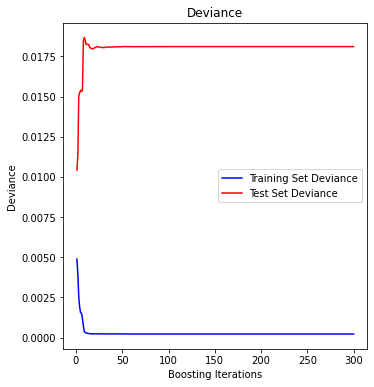

In [ ]:
boost = GradientBoostingRegressor(n_estimators=target_number_of_trees, learning_rate=1, max_depth=4)
boost = boost.fit(X_train, y_train)

y_pred_boost = boost.predict(X)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
# the train_score_ variable is a list that records the deviance of the model for any given number of trees. gbr.train_score_[0] is the deviance when we only had the initial tree, whereas
# gbr.train_score_[100] is the deviance by the time we have created 100 trees.
# This is plotted against a simple list that goes from 1 to our target number of trees.
plt.plot(np.arange(target_number_of_trees) + 1, boost.train_score_, 'b-',
         label='Training Set Deviance')

# We also want to see how well we could handle the test set each time. 
# The staged_predict function takes an X, and returns a list of the predictions for X at various stages of the training: What did we pick when we had 1 tree, 2 trees, 3 trees, etc.
# We will compare our predictions at each stage against the test data, and compute the deviance
test_score = np.zeros((target_number_of_trees,), dtype=np.float64) # this is just a list of 0s

for i, y_pred in enumerate(boost.staged_predict(X_test)):
    # For each prediction, compute the loss function comparing the actual data with your prediction at a given stage of training
    test_score[i] = boost.loss_(y_test, y_pred)
    
plt.plot(np.arange(target_number_of_trees) + 1, test_score, 'r-',
         label='Test Set Deviance')

plt.legend(loc='middle')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.show()

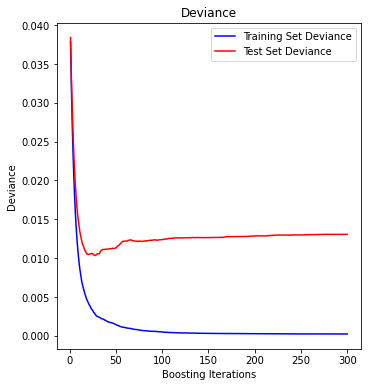

In [ ]:
boost = GradientBoostingRegressor(n_estimators=target_number_of_trees, learning_rate=0.1, max_depth=4)
boost = boost.fit(X_train, y_train)

y_pred_boost = boost.predict(X)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
# the train_score_ variable is a list that records the deviance of the model for any given number of trees. gbr.train_score_[0] is the deviance when we only had the initial tree, whereas
# gbr.train_score_[100] is the deviance by the time we have created 100 trees.
# This is plotted against a simple list that goes from 1 to our target number of trees.
plt.plot(np.arange(target_number_of_trees) + 1, boost.train_score_, 'b-',
         label='Training Set Deviance')

# We also want to see how well we could handle the test set each time. 
# The staged_predict function takes an X, and returns a list of the predictions for X at various stages of the training: What did we pick when we had 1 tree, 2 trees, 3 trees, etc.
# We will compare our predictions at each stage against the test data, and compute the deviance
test_score = np.zeros((target_number_of_trees,), dtype=np.float64) # this is just a list of 0s

for i, y_pred in enumerate(boost.staged_predict(X_test)):
    # For each prediction, compute the loss function comparing the actual data with your prediction at a given stage of training
    test_score[i] = boost.loss_(y_test, y_pred)
    
plt.plot(np.arange(target_number_of_trees) + 1, test_score, 'r-',
         label='Test Set Deviance')

plt.legend(loc='middle')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.show()

The distance between the test set and the training set increases so much with any increase in the learning rate and the max depth of the tree. It appears the ideal learning_rate is 0.05 with a max_depth of 1. The two training sets with these (learning_rate=0.05, max_depth=1) appear to be good for prediction.

### 2.6 Conclusion on Decision Trees
Amongst the three decision trees models; Random forest, AdaBoosted trees and Gradient Boosted Trees, I prefer Random forest the most because it is easier to visualize and determine the models feature importance as opposed to Gradient boosted Trees where you have to use guess work as you alter max_depth and min_samples_leaf in order to ensure the models aren't overfitting. The down side of random forest is trying to scroll through the decision trees to make sense of the results.

### 3.0 Data Cleaning

#### 3.0.1 Further Data Cleaning for Exploratory Data Analysis and Support Vector Machine

N/B: Before performing the decision trees analysis, I had done a little bit cleaning of the dataset by replacing the '?' with 0. Changing the datatypes for the continuous variables from object to numeric. I had also checked for the duplicate values and found out that they aren't similar so I didn't drop them. So, for further data cleaning, I will check for data consistency, data quality by checking for any anomalies, outliers and removing them. Last but not least I will drop unnecessary columns such as 'on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid' and 'query_hyperthyroid' that evidently suggest a patient has thyroid issues because they will be biased on the analysis as to whether a patient has hypothyroidism.

In [ ]:
# Review the original Dataframe
data_df.head(1)

status  age sex on_thyroxine  ... FTI_measured   FTI TBG_measured  TBG
0  hypothyroid   72   M            f  ...            y  10.0            n  0.0

[1 rows x 26 columns]

In [ ]:
# check the statistics
data_df.describe()

age          TSH  ...          FTI          TBG
count  3163.000000  3163.000000  ...  3163.000000  3163.000000
mean     43.941195     5.046782  ...   106.386310     2.571483
std      25.235169    22.160083  ...    65.607474    10.204298
min       0.000000     0.000000  ...     0.000000     0.000000
25%      27.000000     0.000000  ...    85.000000     0.000000
50%      48.000000     0.400000  ...   105.000000     0.000000
75%      64.000000     1.800000  ...   126.000000     0.000000
max      98.000000   530.000000  ...   881.000000   122.000000

[8 rows x 7 columns]

In [ ]:
# Check for missing values
data_df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

Reviewing some of the variables that had values such as '?'

In [ ]:
# Check TBG column value count for '?' values
info = data_df['TBG'].value_counts()
print(info.head(5))

# Check the percentage of TBG with '?' values having a total of 3163 data points
# for TBG column and 2903 values of '?'
c = (2903/3163)*100

print(f"\nThe total number of TBG values with '0' is {c} of the entire dataset.\n"
"This was too much data to lose. Therefore, I replaced the ? with 0.")

0.0     2904
28.0      14
25.0      13
23.0      13
21.0      13
Name: TBG, dtype: int64

The total number of TBG values with '0' is 91.77995573822321 of the entire dataset.
This was too much data to lose. Therefore, I replaced the ? with 0.


In [ ]:
data_df['query_on_thyroxine'].unique() # f stands for false and t stand for true

array(['f', 't'], dtype=object)

In [ ]:
# check unique values for the age variable
data_df['age'].unique()

array([72, 15, 24, 77, 85, 64, 20, 42, 69, 75, 53, 59, 68, 50, 78, 65, 28,
       43, 40, 84,  0, 83, 63, 73, 36, 27, 48, 71, 60, 34, 79, 62, 74, 32,
       41, 70, 29,  5, 58, 35, 51, 22, 16, 44, 39, 47, 18, 17, 88, 56, 30,
       45, 66, 52, 54, 80, 33, 38, 92, 67, 46, 13, 89, 61, 49, 26, 57, 31,
       90, 81, 25, 37, 76, 87, 23, 55, 86, 98, 21, 97,  1,  6, 14, 82, 11,
       19,  9, 12, 10,  8,  7,  4, 93])

In [ ]:
# Check how many '?' are ther on the age column
age_unknown = data_df['age'].value_counts()
age_unknown.head(4)

0     446
59     64
60     64
62     63
Name: age, dtype: int64

In [ ]:
# Instead of replacing the'?' on the age column, we will drop them for they are few (446 in number)
# and doing analysis without knowing the age of patient might not be of any help
# when determining if age is a determinant on causes of thyroidism
df = data_df.copy(deep=True)
df = df.drop(df[df['age']== 0].index)
t = df['age'].value_counts()

# confirm the 446 rows with age as zero have been dropped
t.head(4)


60    64
59    64
62    63
28    60
Name: age, dtype: int64

In [ ]:
# Check the size of the remaining dataframe after dropping the rows with age as zero
df.shape

(2717, 26)

In [ ]:
# Check total data points with no TSH
df['TSH'].value_counts()

0.00      1199
0.70        66
0.80        60
0.90        58
1.30        56
          ... 
43.00        1
90.00        1
0.09         1
164.00       1
9.00         1
Name: TSH, Length: 223, dtype: int64

1199 datapoint with no TSH values are too many to be discarded. I will not drop them because the remaining data will be less for a true reflection of the population.

In [ ]:
# Check for 0 values in T3.
# I will not drop them either
df['T3'].value_counts()

0.0     636
1.7     120
1.8     118
1.6     118
2.0     115
       ... 
4.8       1
8.9       1
5.6       1
5.5       1
10.2      1
Name: T3, Length: 67, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2717 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     2717 non-null   object 
 1   age                        2717 non-null   int64  
 2   sex                        2717 non-null   object 
 3   on_thyroxine               2717 non-null   object 
 4   query_on_thyroxine         2717 non-null   object 
 5   on_antithyroid_medication  2717 non-null   object 
 6   thyroid_surgery            2717 non-null   object 
 7   query_hypothyroid          2717 non-null   object 
 8   query_hyperthyroid         2717 non-null   object 
 9   pregnant                   2717 non-null   object 
 10  sick                       2717 non-null   object 
 11  tumor                      2717 non-null   object 
 12  lithium                    2717 non-null   object 
 13  goitre                     2717 non-null   objec

In [ ]:
# Drop unnecessary columns or columns that will be biased during analysis
column_names2 = ['on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication',
                 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid']

updated_df = df.copy(deep=True)
updated_df.drop(columns= column_names2, inplace=True)
updated_df.columns
        

Index(['status', 'age', 'sex', 'pregnant', 'sick', 'tumor', 'lithium',
       'goitre', 'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured',
       'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured',
       'TBG'],
      dtype='object')

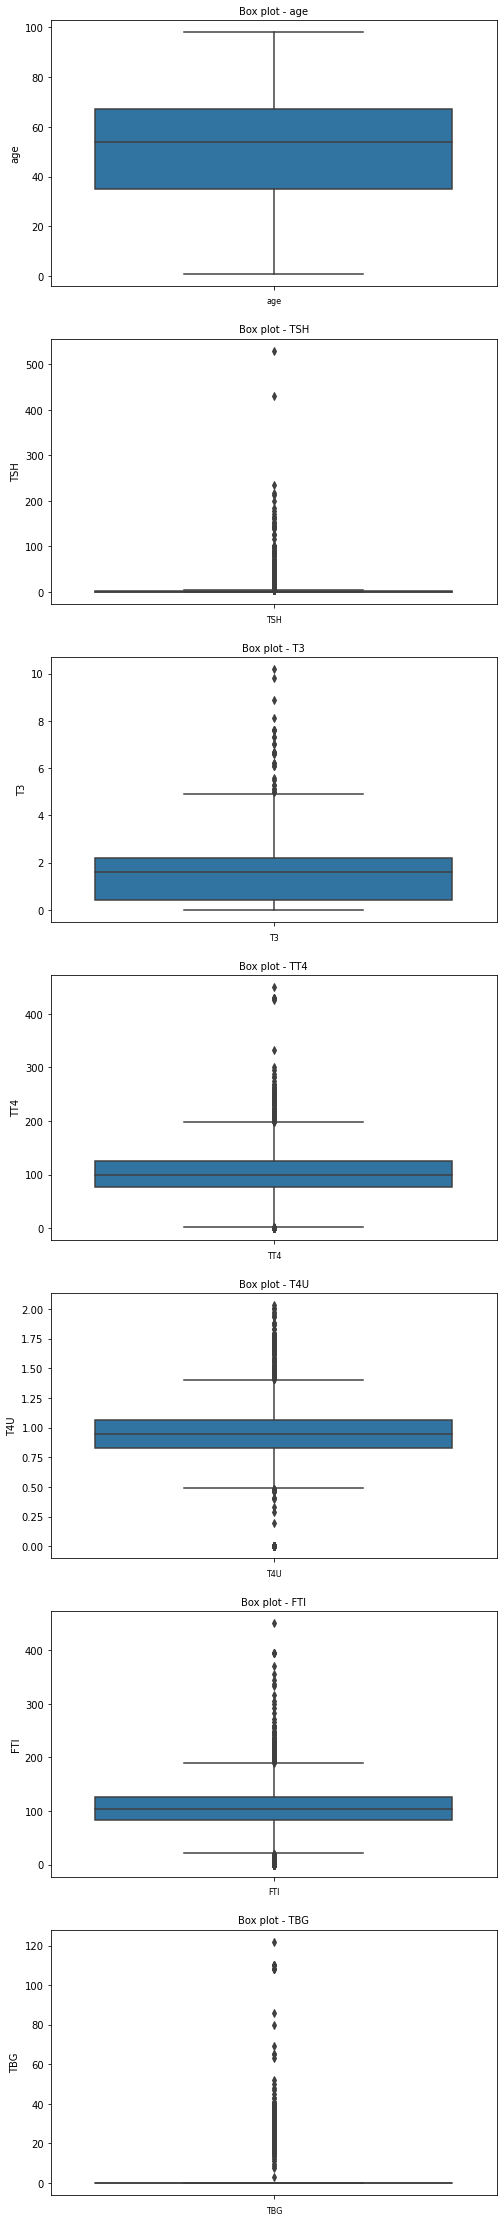

In [ ]:
# Check for outliers
# Plotting columns with numerical values only to check for outliers
col_names = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

fig, ax = plt.subplots(len(col_names), figsize= (8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = updated_df[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

In [ ]:
updated_df['T4U'].value_counts()

0.00    221
0.98     76
0.94     71
1.01     70
0.93     67
       ... 
0.40      1
1.93      1
1.94      1
1.86      1
1.64      1
Name: T4U, Length: 147, dtype: int64

In [ ]:
# Check for outliers in the dataset.
# Set the 25th percentile
Quantile_1 = updated_df[col_names].quantile(0.25)

# set the 75th percentile
Quantile_3 = updated_df[col_names].quantile(0.75)

# calculate the quantile range
IQR = Quantile_3 - Quantile_1

# Determine the outliers
outliers = updated_df[col_names][((updated_df[col_names] < (Quantile_1 - 1.5 * IQR))
 |(updated_df[col_names] > (Quantile_3 + 1.5 * IQR))).any(axis=1)]
j = outliers.shape

# Outliers Percentage
percentage_of_outliers = (len(outliers)/len(updated_df))*100

# The total number of outliers
print(f"The total number of outliers are {j}. Which translates to {percentage_of_outliers}% of the data.")

The total number of outliers are (871, 7). Which translates to 32.057416267942585% of the data.


In [ ]:
updated_df.shape

(2717, 20)

In [ ]:
# Dropping the outliers
Quantile_1= updated_df.quantile(0.25)
Quantile_3 = updated_df.quantile(0.75)
IQR = Quantile_3-Quantile_1
IQR
updated_df_new = updated_df[~((updated_df < (Quantile_1 - 1.5 * IQR)) |(updated_df > (Quantile_3 + 1.5 * IQR))).any(axis=1)]
updated_df_new.shape

(1846, 20)

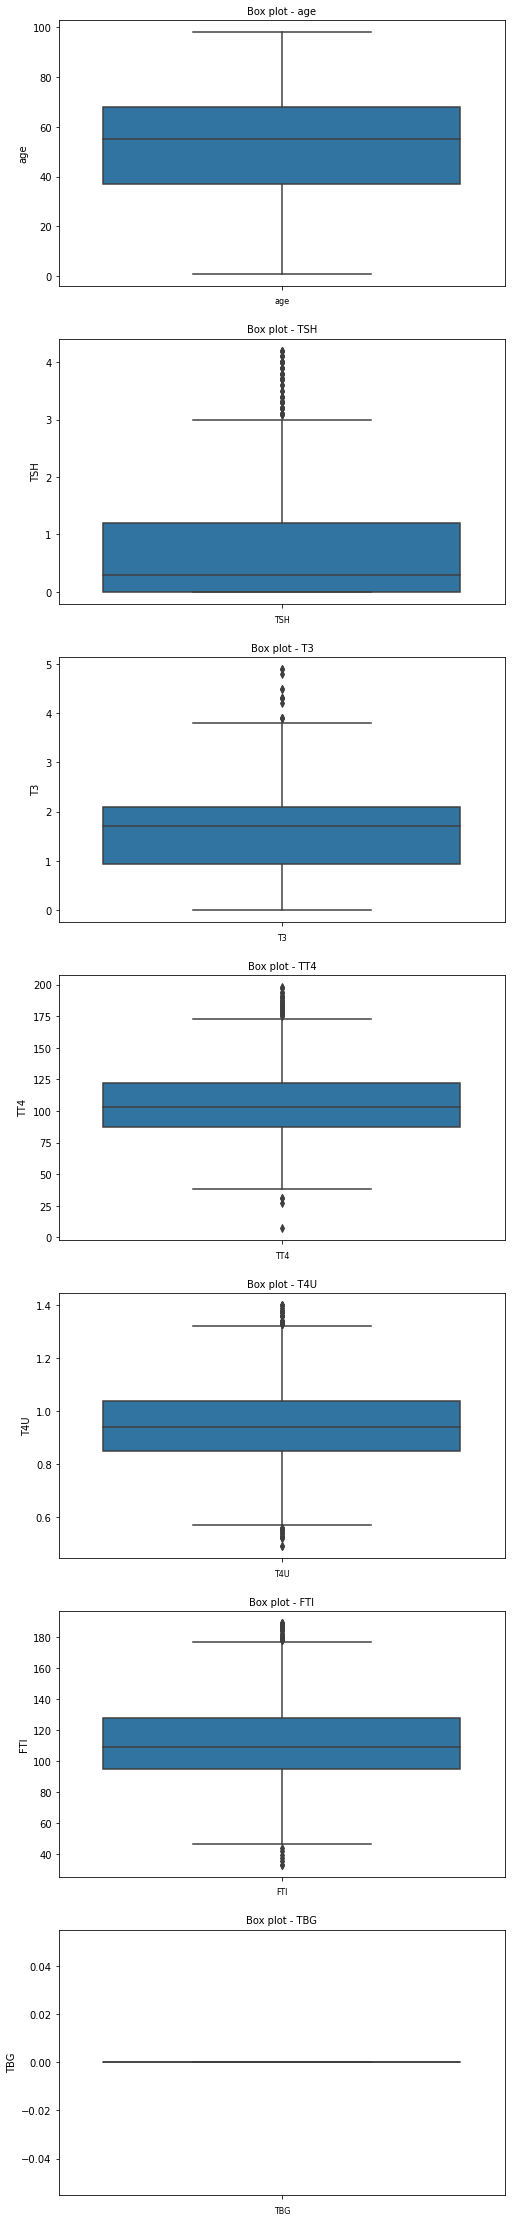

In [ ]:
# Check if all outliers have been dropped
# Check for outliers
# Plotting columns with numerical values only to check for outliers
col_names = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

fig, ax = plt.subplots(len(col_names), figsize= (8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = updated_df_new[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

In [ ]:
# Checking the shape of TBG variable after dropping the outliers
updated_df_new['TBG'].value_counts()

0.0    1846
Name: TBG, dtype: int64

From the previous analysis in decision trees, there was some evidence of TBG being a determinant as to whether a patient will have hypothyroid or not. dropping the outliers leaves us with no entries on the TBG variable. I will therefore keep the outliers. I will proceed with the updated_df dataframe for further analysis.

In [ ]:
# Preview the shape of the dataframe
updated_df.shape

(2717, 20)

In [ ]:
# preview the columns
updated_df.columns

Index(['status', 'age', 'sex', 'pregnant', 'sick', 'tumor', 'lithium',
       'goitre', 'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured',
       'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured',
       'TBG'],
      dtype='object')

In [ ]:
# Checking the data distribution type by performing a normality test using the Shapiro Test
# importing the shapiro function
from scipy.stats import shapiro

col_names = updated_df[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']]

# Test for normality
stat, p = shapiro(col_names)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpreting the results
alpha = 0.05
if p > alpha: 
  print('Sample looks Guassian.')
else:
  print('Sample does not look Guassian.')


Statistics=0.743, p=0.000
Sample does not look Guassian.


#### 3.0.2 Feature Engineering

In [ ]:
# Create a column with age grouped in categories
# but first heck the uniqueness in age
updated_df['age'].unique()

array([72, 15, 24, 77, 85, 64, 20, 42, 69, 75, 53, 59, 68, 50, 78, 65, 28,
       43, 40, 84, 83, 63, 73, 36, 27, 48, 71, 60, 34, 79, 62, 74, 32, 41,
       70, 29,  5, 58, 35, 51, 22, 16, 44, 39, 47, 18, 17, 88, 56, 30, 45,
       66, 52, 54, 80, 33, 38, 92, 67, 46, 13, 89, 61, 49, 26, 57, 31, 90,
       81, 25, 37, 76, 87, 23, 55, 86, 98, 21, 97,  1,  6, 14, 82, 11, 19,
        9, 12, 10,  8,  7,  4, 93])

In [ ]:
# Check the highest age
updated_df['age'].max()

98

In [ ]:
# check the minimum age 
updated_df['age'].min()

1

In [ ]:
# Create a new column for the age group. we shall group them as follows
#'Toddler/baby, ages 0-9, label 0
#'Teen', ages 10 -17, label 1
#'Youth', ages 18 - 35, label 2
#'Adult' ages 36 - 60, label 3
# 'Elderly' ages 61 - 100, label 4
category = pd.cut(updated_df['age'],bins=[0,9,18,36,61,105],labels=[0,1,2,3,4])
updated_df.insert(1,'age_group',category)
updated_df.head()

status age_group  age sex  ... FTI_measured   FTI TBG_measured  TBG
0  hypothyroid         4   72   M  ...            y  10.0            n  0.0
1  hypothyroid         1   15   F  ...            y  17.0            n  0.0
2  hypothyroid         2   24   M  ...            y   0.0            n  0.0
3  hypothyroid         2   24   F  ...            y   6.0            n  0.0
4  hypothyroid         4   77   M  ...            y  44.0            n  0.0

[5 rows x 21 columns]

In [ ]:
# Preview the columns
updated_df.columns

Index(['status', 'age_group', 'age', 'sex', 'pregnant', 'sick', 'tumor',
       'lithium', 'goitre', 'TSH_measured', 'TSH', 'T3_measured', 'T3',
       'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI',
       'TBG_measured', 'TBG'],
      dtype='object')

In [ ]:
# Convert all the categorical data to numeric
# but first check for the unique features in the dataset
for features in updated_df.columns:
  print(f'Unique: {features}')
  print(updated_df[features].unique())
  print(' ')
  print('****'*18)

Unique: status
['hypothyroid' 'negative']
 
************************************************************************
Unique: age_group
[4, 1, 2, 3, 0]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]
 
************************************************************************
Unique: age
[72 15 24 77 85 64 20 42 69 75 53 59 68 50 78 65 28 43 40 84 83 63 73 36
 27 48 71 60 34 79 62 74 32 41 70 29  5 58 35 51 22 16 44 39 47 18 17 88
 56 30 45 66 52 54 80 33 38 92 67 46 13 89 61 49 26 57 31 90 81 25 37 76
 87 23 55 86 98 21 97  1  6 14 82 11 19  9 12 10  8  7  4 93]
 
************************************************************************
Unique: sex
['M' 'F' '0']
 
************************************************************************
Unique: pregnant
['f' 't']
 
************************************************************************
Unique: sick
['f' 't']
 
************************************************************************
Unique: tumor
['f' 't']
 
************************************

In [ ]:
# Convert all the categorical data to numeric
# but first check for the unique features in the dataset
updated_df = updated_df.replace({"hypothyroid":1, "negative":0, "F":1, "M":0, "t":1,"f":0, "y":1, "n":0})
updated_df.head(2)

status age_group  age sex  ...  FTI_measured   FTI  TBG_measured  TBG
0       1         4   72   0  ...             1  10.0             0  0.0
1       1         1   15   1  ...             1  17.0             0  0.0

[2 rows x 21 columns]

### 4.0 Exploratory Analysis

#### 4.0.1 Univariate Analysis

In [ ]:
# Descriptive analysis of the dataset
updated_df.describe()

status          age  ...  TBG_measured          TBG
count  2717.000000  2717.000000  ...   2717.000000  2717.000000
mean      0.050055    51.154214  ...      0.083916     2.636768
std       0.218099    19.294405  ...      0.277313    10.363246
min       0.000000     1.000000  ...      0.000000     0.000000
25%       0.000000    35.000000  ...      0.000000     0.000000
50%       0.000000    54.000000  ...      0.000000     0.000000
75%       0.000000    67.000000  ...      0.000000     0.000000
max       1.000000    98.000000  ...      1.000000   122.000000

[8 rows x 19 columns]

From the descriptive analysis above, the average age for patients is 51 years. The youngest with an age of 1 year old while the oldest is 98 years old. The person with the highest T3 value was 10.2 while TSH at 530. Making comparison of these values with normal range values is difficult because there's no unit of measure provided in the columns dscription/data details.

In [ ]:
# Calculate the mean and standard deviation the the dataset
col_names = updated_df[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']]

mean = np.mean(col_names)
std = np.std(col_names)
print(f"The mean of the dataset is:\n {mean}")
print(f"\nThe standard deviation is:\n {std}")

The mean of the dataset is:
 age     51.154214
TSH      5.074950
T3       1.492050
TT4    100.366544
T4U      0.909993
FTI    103.050350
TBG      2.636768
dtype: float64

The standard deviation is:
 age    19.290854
TSH    22.227868
T3      1.204996
TT4    52.966139
T4U     0.343654
FTI    51.488758
TBG    10.361338
dtype: float64


In [ ]:
# Check the Skewness
for i, col_val in enumerate(col_names.columns):
  print(f"The skewness of {col_val} is: {col_names[col_val].skew()}")

The skewness of age is: -0.16246188596227887
The skewness of TSH is: 11.18265935571858
The skewness of T3 is: 1.1149273147736305
The skewness of TT4 is: 0.663182073678693
The skewness of T4U is: -0.9272548776627472
The skewness of FTI is: 0.46280822587062564
The skewness of TBG is: 5.7860580253385185


A skewness value of 1 for T3, TT4 and FTI is a clear indication that the distribution is positively skewed which is heavily tailed (has outliers) while T4U and age have no outliers for it is negatively skewed. TSH with a skewness value of 11 indicates too many outliers thus heavily tailed followed by TBG with a skewness value of 5.7.

In [ ]:
# Check the Kurtosis
for i, col_val in enumerate(col_names.columns):
  print(f"The kurtosis of {col_val} is: {col_names[col_val].kurt()}")

The kurtosis of age is: -0.9607597313796994
The kurtosis of TSH is: 188.0592293820226
The kurtosis of T3 is: 4.101287424926528
The kurtosis of TT4 is: 3.7330203774806936
The kurtosis of T4U is: 2.375864749356774
The kurtosis of FTI is: 3.517721165944419
The kurtosis of TBG is: 45.17224962082123


Values greater than positive 1 indicate that the distribution is too peaked. In this case, the TSH is highly peaked with a kurtosis of 188 followed by TBG at 45, then T3 with a kurtosis of 4, TT4 and FTI with a kurtosis of 3 and finally T4U having a kurtosis of 2 and age -0.96. The TSH and TBG are highly peaked due to the outliers in them. Age with a value od -0.96 is a clear indication that the distribution is too flat.

In [ ]:
# check the unique value for status to confirm with label encoded values
data_df['status'].unique()

array(['hypothyroid', 'negative'], dtype=object)

In [ ]:
# confirm the unique values for the sick variable
data_df['sick'].unique()

array(['f', 't'], dtype=object)

In [ ]:
# Confirm the unique values for the pregnant variable
data_df['pregnant'].unique()

array(['f', 't'], dtype=object)

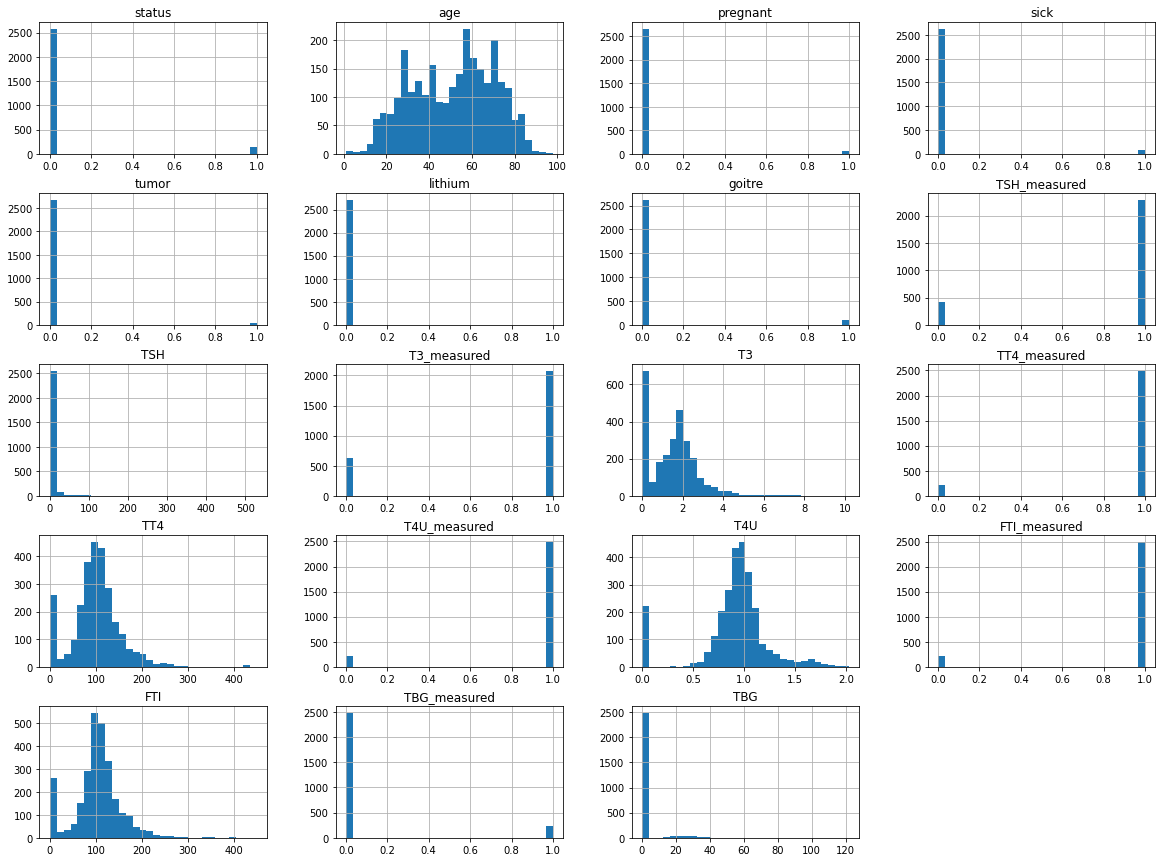

In [ ]:
# Plot a histogram
hist_df = updated_df[['status', 'age_group', 'age', 'sex', 'pregnant', 'sick', 'tumor',
                  'lithium', 'goitre', 'TSH_measured', 'TSH', 'T3_measured', 'T3',
                  'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI',
                  'TBG_measured', 'TBG']]
hist_df.hist(bins=30, figsize=(20, 15));

Most patients from the sample registered no presence of TBG, TBG_measured, tumor, lithium, goitre as symptoms. The highest value registered for FTI was over 500 and the total number of patients with this FTI value was 100. Majority of the patients were in the age bracket of 50 to 60. Thus having the average age of the population as 51.

Over 2500 patients were reported to have hypothyroidism (0 represents hypothyrodism while 1 represent negative). Over 400 patients had T4U value 0f 1.0.

2000 and 2500 patients were tested for T3 and TT4 respectively. Majority of the participants were not sick neither were they pregnant. Most of the participant were females.

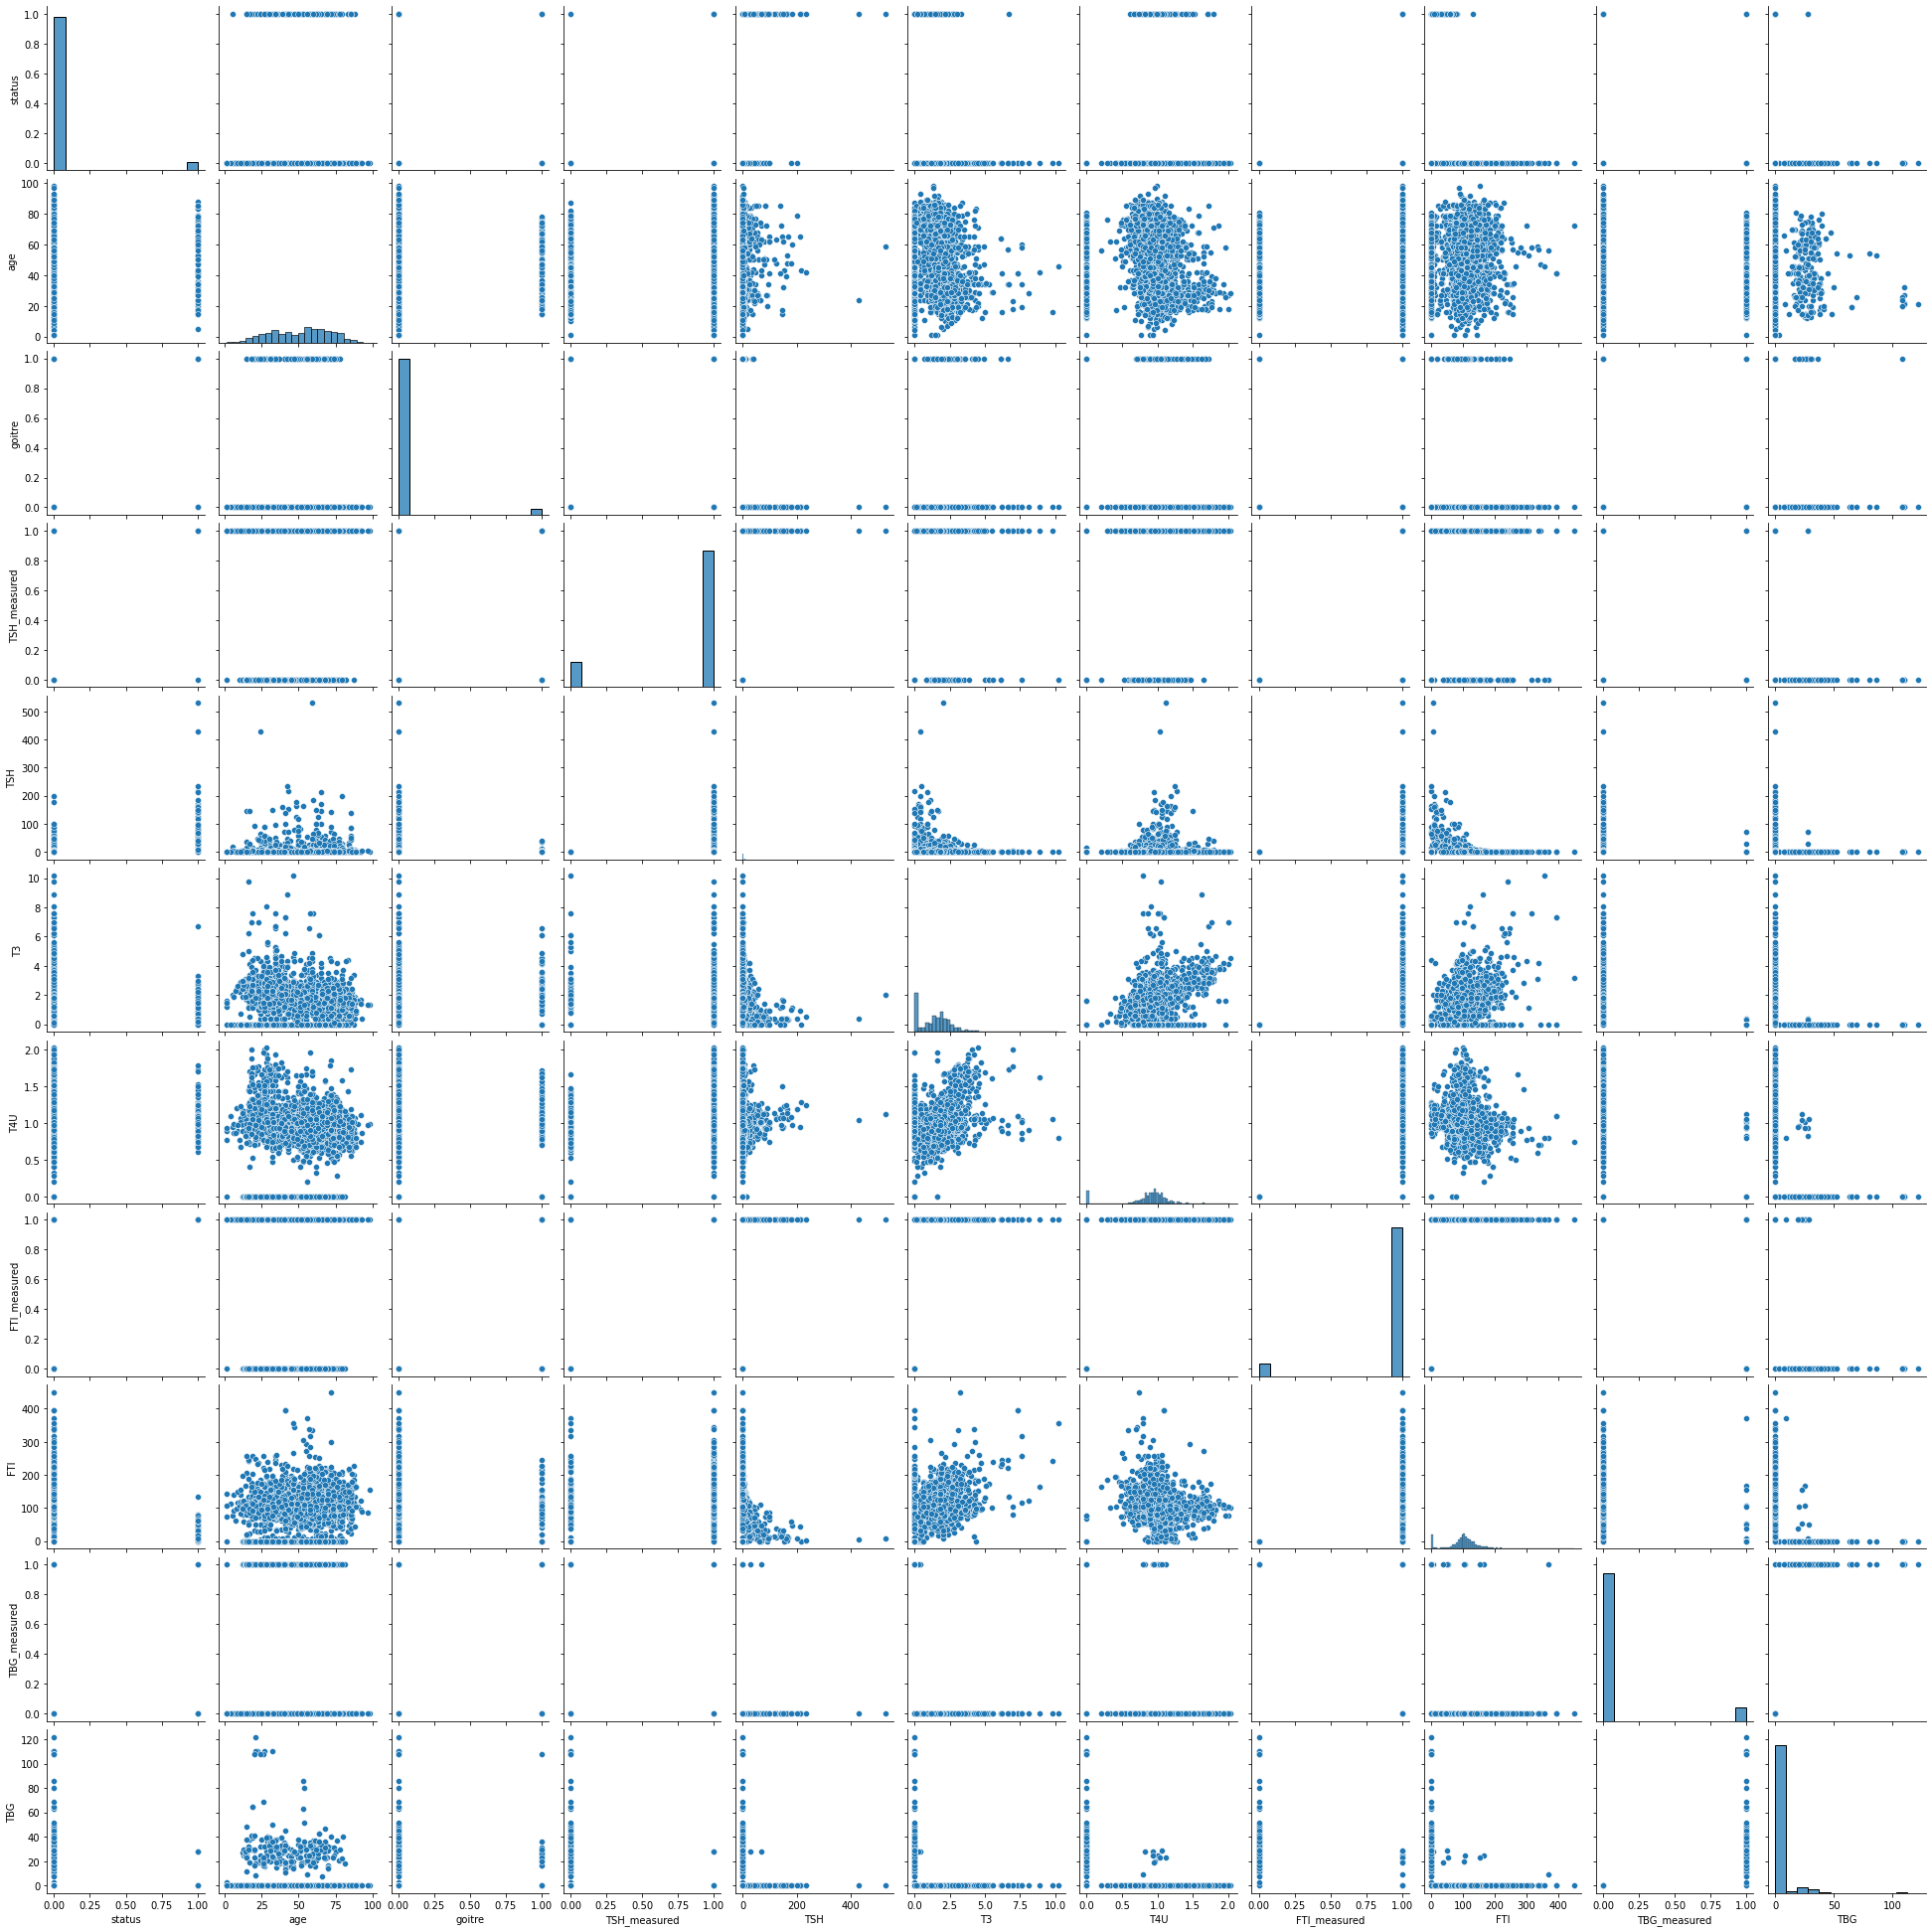

In [ ]:
# Plot a pairplot to compare relationship between variables
sns.pairplot(variables_df);

A pairplot will show if there's any correlation between two variables but a heatmap will give a deeper understanding about the relation.

#### 4.0.2 Bivariate Analysis

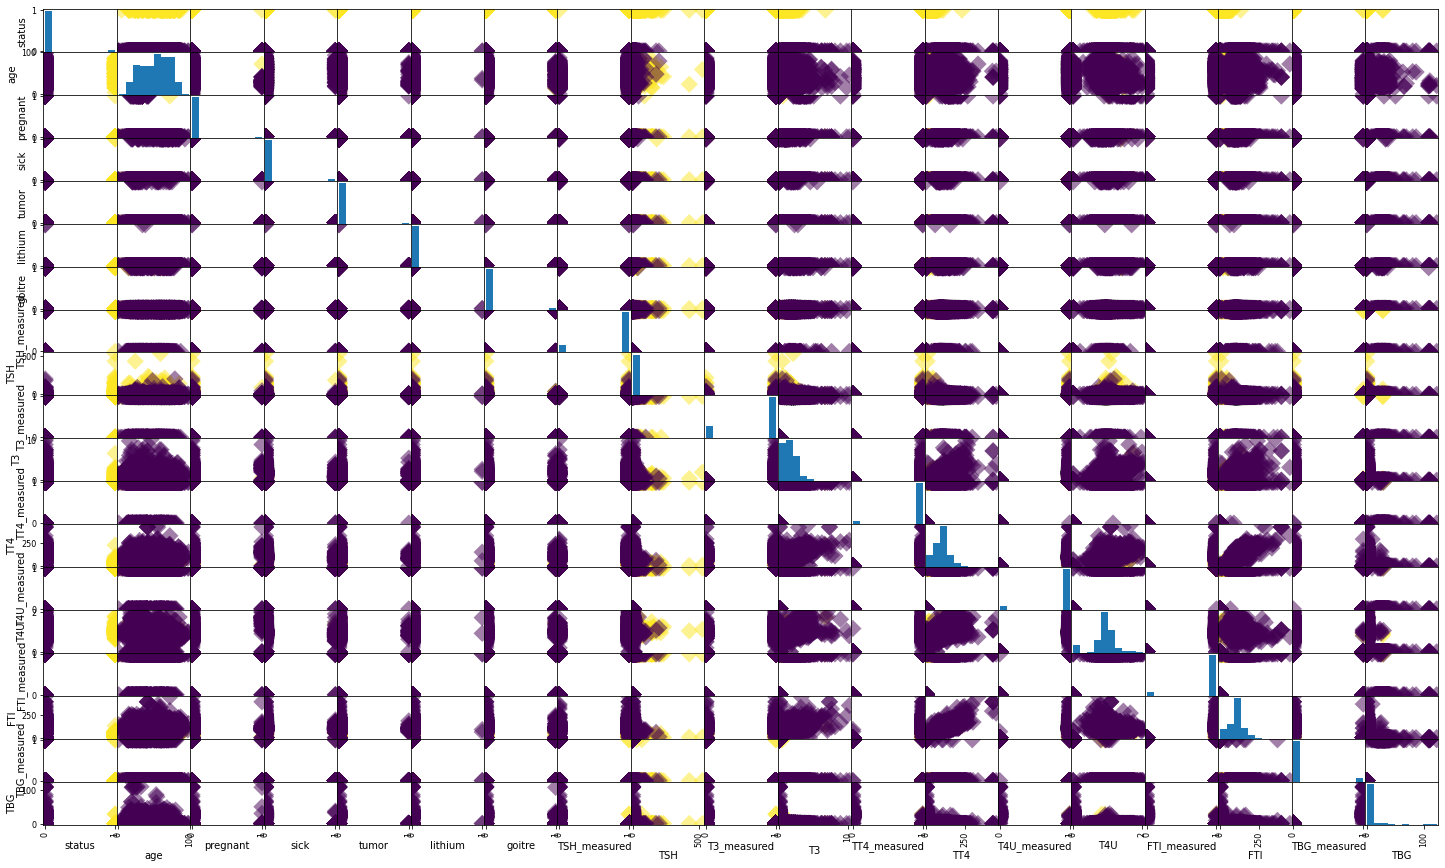

In [ ]:
# plot scatter matrix to display Bivariate Relationships between combination variables
y = updated_df['status']
_ = pd.plotting.scatter_matrix(updated_df, c = y, figsize=[25,15], s=150, marker='D')

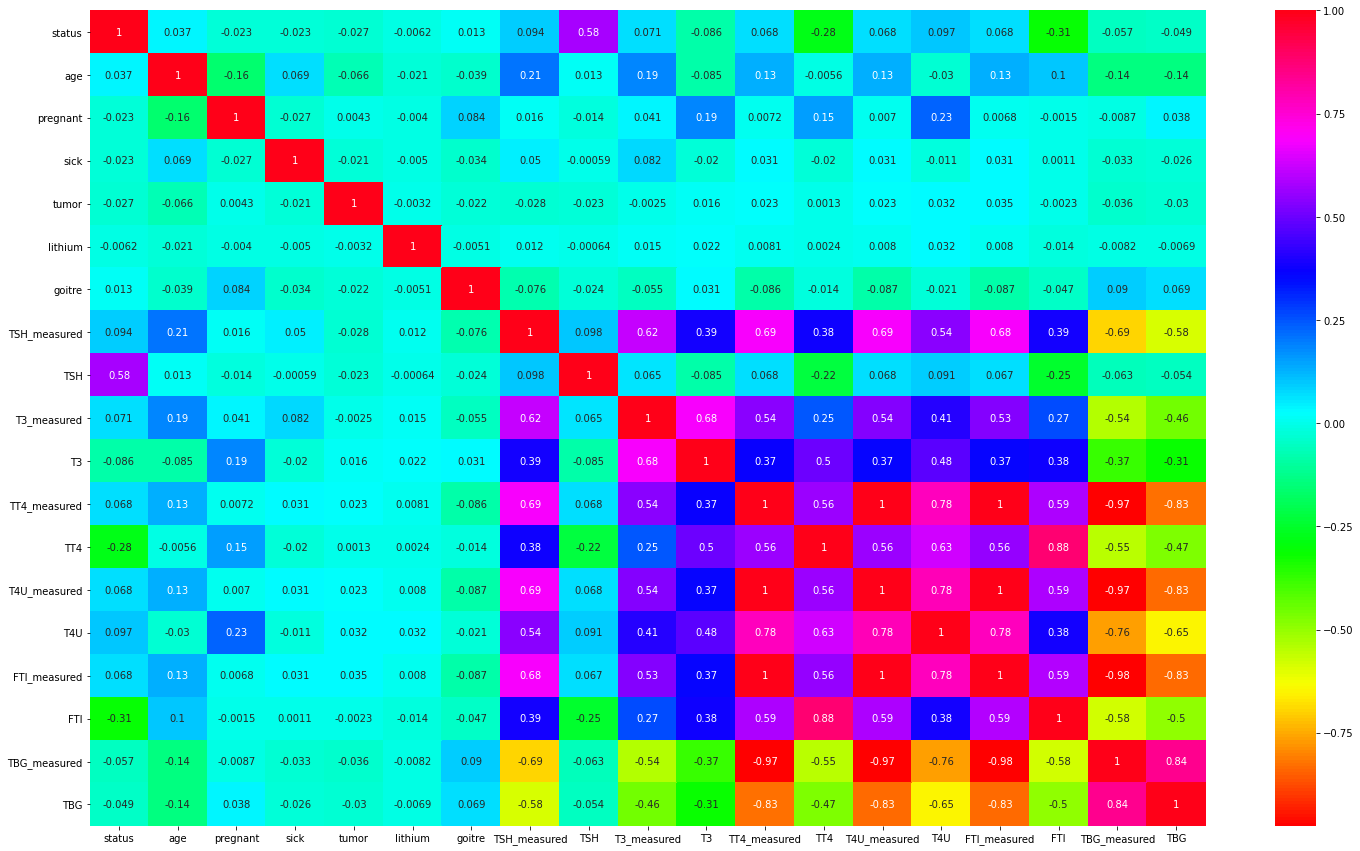

In [ ]:
# Plot a heatmap to see the correlation between the variables
import seaborn as sns

corr=updated_df.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr, annot=True,cmap="hsv");

The heatmap above shows how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. For example, considering the correlation between TBG and status, having a correlation value of -0.049 indicates that two variables are negative correlation (there slope is a negative slope). Meaning if the value of TBG decreases, then the status of a patient having hypothyroidism increases in a very weak linear relation. 

for the case of TBG-measured and TBG, a correation value 0.84 indicates that in the event of an increase of TBG value, then the TBG-measured value will increase in a strong linear relation. A correlation value of positive 1 shows a strong linear positive correlation while that of negative 1 shows a strong opposite correlation from the other variable. When one increases, the other variable decreases. Values close to zero, whether positive or negative, shows a weak correlation. Correlation values of 0 indicates no correlation amongst the variables at all.

#### 4.0.3 Performing Discriminant Analysis

In [ ]:
# Preview the columns
updated_df.columns

Index(['status', 'age_group', 'age', 'sex', 'pregnant', 'sick', 'tumor',
       'lithium', 'goitre', 'TSH_measured', 'TSH', 'T3_measured', 'T3',
       'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI',
       'TBG_measured', 'TBG'],
      dtype='object')

In [ ]:
# create a copy of the dataframe
lda_df = updated_df.copy(deep=True)
lda_df.head(1)

status age_group  age sex  ...  FTI_measured   FTI  TBG_measured  TBG
0       1         4   72   0  ...             1  10.0             0  0.0

[1 rows x 21 columns]

In [ ]:
# Create features and labels

X = lda_df[['age_group', 'age', 'sex', 'pregnant', 'sick', 'tumor',
            'lithium', 'goitre', 'TSH_measured', 'TSH', 'T3_measured', 'T3',
            'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI',
            'TBG_measured', 'TBG']].values

y = lda_df['status'].values

In [ ]:
# Divide data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

#display the intercept / bias
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)

-0.164025946316193
[-5.01109096e-03  7.10960611e-04  1.06866221e-02 -1.62973052e-02
 -3.41683862e-02 -3.06856139e-02 -1.08392512e-01  2.35835779e-02
  3.21669203e-02  5.31240708e-03 -9.84927414e-03  1.28135750e-03
 -1.62879034e-02 -1.64731540e-03 -1.62879034e-02  1.77994956e-01
  1.59520998e-01  1.55373751e-04  1.30372752e-01  1.91108358e-04]


From the findings above, the values with regressor coefficient of negative shows that those independent variables have little or no impact on determining whether a patient  has hypothyroid or not.These variables are age_group, pregnant, sick, tumor, lithium, T3-measured, TT4-measured, TT4 and T4U-measured. We will therefore drop them and re-do the analysis again and check the accuracy of our prediction model.

In [ ]:
# Drop the independent variables that have no impact on the dependent variable
# These are bedrooms, zipcode, longitude, sqft-lot15, year-built and renovations
variables_df = lda_df.copy(deep=True)
variables_df.head(1)
variables_df.drop(columns=['age_group', 'pregnant', 'sick', 'tumor', 'lithium', 
                           'T3_measured', 'TT4_measured', 'TT4', 'T4U_measured'], inplace=True)
variables_df.head(1)


status  age sex  goitre  ...  FTI_measured   FTI  TBG_measured  TBG
0       1   72   0       0  ...             1  10.0             0  0.0

[1 rows x 12 columns]

In [ ]:
# Create features and labels
X = variables_df[['age',	'sex',	'goitre',	'TSH_measured',	'TSH',	'T3',	'T4U',
                  'FTI_measured',	'FTI',	'TBG_measured',	'TBG']].values
y = variables_df['status'].values

In [ ]:
# Divide data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

#display the intercept / bias
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)

-0.1637939747540875
[ 5.36182723e-04  8.98315583e-03  2.62777996e-02  2.41893665e-02
  5.44085932e-03 -1.71102623e-03  1.15697765e-02  2.77883928e-01
 -1.36567018e-03  1.26081027e-01  1.41562331e-04]


In [ ]:
y_predict = regressor.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})

comparison_frame

Actual  Predicted
0         0   0.101158
1         0  -0.033966
2         0   0.116826
3         0   0.054087
4         0   0.015469
..      ...        ...
811       0   0.056742
812       0   0.070633
813       0   0.532192
814       0   0.048008
815       1   0.287881

[816 rows x 2 columns]

In [ ]:
y_predict = regressor.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predict.flatten()})

comparison_frame.describe()

Actual   Predicted
count  816.000000  816.000000
mean     0.045343    0.053910
std      0.208183    0.168114
min      0.000000   -0.425598
25%      0.000000   -0.002026
50%      0.000000    0.032681
75%      0.000000    0.071476
max      1.000000    3.060481

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.08371869168711371
Mean Squared Error: 0.03082882525534485
Root Mean Squared Error: 0.17558139211016882


In [ ]:
# Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Perform LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
# Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=5, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluating the Performance
# As always, the last step is to evaluate performance of the algorithm 
# with the help of a confusion matrix and find the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[756  23]
 [  7  30]]
Accuracy0.9632352941176471


From the above model the True values are 756 and 30 and False values during prediction will be 23 and 7. The accuracy of these model is 96%. This seems good enough but it might be an overfitted model. I will perform polynomial analysis with the same independent variable are determine the accuracy after establishing if there are any correlated variables and droping them.

### 5.0 Implementing the Solution-Multiple Linear Regression

#### 5.0.1 Polynomial Regression

> We'll first check the multicollinearity between the variables and drop those variables that seem to be correlated.





#### 5.0.2 Multicollinearity

#### 5.0.3 Finding correlation between the independent variables

In [ ]:
# Make a copy of the dataframe
corr_df = variables_df.copy(deep=True)
corr_df.head(2)

status  age sex  goitre  ...  FTI_measured   FTI  TBG_measured  TBG
0       1   72   0       0  ...             1  10.0             0  0.0
1       1   15   1       0  ...             1  17.0             0  0.0

[2 rows x 12 columns]

In [ ]:
corr.columns

Index(['status', 'age', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [ ]:
# Set status as the dependent variable
# Compute the correlation then use the correlation to compute the VIF score for each variable
# We'll drop the price column
prediction_df = corr_df.drop(columns=['status'], inplace=True)
prediction_df = corr_df.corr()
prediction_df 

age    goitre  ...  TBG_measured       TBG
age           1.000000 -0.038627  ...     -0.137705 -0.141482
goitre       -0.038627  1.000000  ...      0.090124  0.069212
TSH_measured  0.212235 -0.075973  ...     -0.694578 -0.584681
TSH           0.012610 -0.024268  ...     -0.063130 -0.053627
T3           -0.084571  0.030788  ...     -0.373989 -0.314526
T4U          -0.030446 -0.021431  ...     -0.764242 -0.650825
FTI_measured  0.132853 -0.087029  ...     -0.975866 -0.831627
FTI           0.099622 -0.046778  ...     -0.578549 -0.495770
TBG_measured -0.137705  0.090124  ...      1.000000  0.840816
TBG          -0.141482  0.069212  ...      0.840816  1.000000

[10 rows x 10 columns]

The tabe above shows how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. Using these correlations to compute the VIF score for each variable. But first we'll create a new dataframe with the inverse of the matrix above.

#### 5.0.4 Calculating the VIF Score for each independent variable

In [ ]:
# Create a new dataframe with the inverse of the matrix above correlations
pd.DataFrame(np.linalg.inv(prediction_df.values), index = prediction_df.index, columns=prediction_df.columns)

age    goitre  ...  TBG_measured       TBG
age           1.122997  0.001609  ...      0.026249  0.101006
goitre        0.001609  1.017530  ...     -0.126271  0.022344
TSH_measured -0.299636  0.040496  ...      0.991967 -0.031360
TSH           0.004548  0.014999  ...     -0.088744  0.003065
T3            0.162896 -0.059878  ...      0.302879  0.009712
T4U           0.303915 -0.093947  ...     -0.085657  0.028837
FTI_measured -0.104935  0.048242  ...     19.925732  0.780758
FTI          -0.045410  0.003523  ...     -0.049866  0.014781
TBG_measured  0.026249 -0.126271  ...     22.941977 -2.116732
TBG           0.101006  0.022344  ...     -2.116732  3.452805

[10 rows x 10 columns]

The VIF score for each variable is below 5. A rule of thumb is if a VIF is > 10, there's high multicollinearity among the variables. In this case, with values around 1, we are in good shape, and could proceed with the regression. However the VIF for FTI-measured is 24.175757 and that of TBG_measured is 22.941977. This indicates that these two variables have a correlation with any other independent variables. 

If the independent variables in a regression model show a perfectly predictable linear relationship, that is a perfect multicollinearity With multicollinearity, the regression coefficients are still consistent but are no longer reliable since the standard errors are inflated. It means that the model’s predictive power is not reduced, but the coefficients may not be statistically significant with a Type II error. It is in this view that I dropped the FTI-measured and TBG_measured variables and check the VIF of the remaining variables again.

Therefore, we will drop them and see what impact they have on the VIF score.

In [ ]:
# Check the columns
corr_df.columns

Index(['age', 'sex', 'goitre', 'TSH_measured', 'TSH', 'T3', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [ ]:
# Compute Correlation after dropping the year renovated variable
prediction_df2 = corr_df.drop(columns=['FTI_measured', 'TBG_measured'], inplace=True)
prediction_df2 = corr_df.corr()
prediction_df2 

age    goitre  TSH_measured  ...       T4U       FTI       TBG
age           1.000000 -0.038627      0.212235  ... -0.030446  0.099622 -0.141482
goitre       -0.038627  1.000000     -0.075973  ... -0.021431 -0.046778  0.069212
TSH_measured  0.212235 -0.075973      1.000000  ...  0.542496  0.386473 -0.584681
TSH           0.012610 -0.024268      0.098452  ...  0.090902 -0.245114 -0.053627
T3           -0.084571  0.030788      0.385587  ...  0.477122  0.376448 -0.314526
T4U          -0.030446 -0.021431      0.542496  ...  1.000000  0.383316 -0.650825
FTI           0.099622 -0.046778      0.386473  ...  0.383316  1.000000 -0.495770
TBG          -0.141482  0.069212     -0.584681  ... -0.650825 -0.495770  1.000000

[8 rows x 8 columns]

In [ ]:
# Calculate the VIF scores
# Create a new dataframe with the inverse of the matrix above correlations
pd.DataFrame(np.linalg.inv(prediction_df2.values), index = prediction_df2.index, columns=prediction_df2.columns)

age    goitre  TSH_measured  ...       T4U       FTI       TBG
age           1.120592  0.004690     -0.325512  ...  0.255020 -0.073507  0.152128
goitre        0.004690  1.013205      0.076541  ... -0.033850  0.038054 -0.049513
TSH_measured -0.325512  0.076541      1.824616  ... -0.400902 -0.156064  0.567467
TSH          -0.000298  0.020627     -0.172075  ... -0.161678  0.416044  0.096327
T3            0.173957 -0.072315     -0.319475  ... -0.539800 -0.310272 -0.196266
T4U           0.255020 -0.033850     -0.400902  ...  2.177543 -0.034720  1.025559
FTI          -0.073507  0.038054     -0.156064  ... -0.034720  1.592766  0.587491
TBG           0.152128 -0.049513      0.567467  ...  1.025559  0.587491  2.258892

[8 rows x 8 columns]

After dropping the FTI-measured and the TBG-measured variables, the VIF score have improved and most of the independent variables have a VIF score of 1 and only two of them have a VIF score of two. I will now proceed with building the prediction model using the independent variables that have no multicollinearity. 



#### 5.0.5 Building the model

In [ ]:
prediction_df2.columns

Index(['age', 'goitre', 'TSH_measured', 'TSH', 'T3', 'T4U', 'FTI', 'TBG'], dtype='object')

In [ ]:
## Preview the columns
lda_df.columns

Index(['status', 'age_group', 'age', 'sex', 'pregnant', 'sick', 'tumor',
       'lithium', 'goitre', 'TSH_measured', 'TSH', 'T3_measured', 'T3',
       'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI',
       'TBG_measured', 'TBG'],
      dtype='object')

In [ ]:
# Import the polynomial features and the linear regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

# Create features and labels
X = variables_df[['age',	'sex',	'goitre',	'TSH_measured',	'TSH',	'T3',	'T4U','FTI',	'TBG']].values
y = variables_df['status'].values

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

# Fit polynomial Regression to the dataset with a degree of 2
polynomial_regression = PolynomialFeatures(degree = 2) 
X_polynomial = polynomial_regression.fit_transform(X)

pol_regression = LinearRegression()
pol_regression.fit(X_polynomial, y)

y_pred = pol_regression.predict(polynomial_regression.fit_transform(X_test))

In [ ]:
# Fit polynomial Regression to the dataset with a degree of 3
polynomial_regression_3 = PolynomialFeatures(degree = 3) 
X_polynomial_3 = polynomial_regression_3.fit_transform(X)

pol_regression_3 = LinearRegression()
pol_regression_3.fit(X_polynomial_3, y)

y_pred_3 = pol_regression_3.predict(polynomial_regression_3.fit_transform(X_test))

In [ ]:
# Fit polynomial Regression to the dataset with a degree of 4
polynomial_regression_4 = PolynomialFeatures(degree = 4) 
X_polynomial_4 = polynomial_regression_4.fit_transform(X)

pol_regression_4 = LinearRegression()
pol_regression_4.fit(X_polynomial_4, y)

y_pred_4 = pol_regression_4.predict(polynomial_regression_4.fit_transform(X_test))

In [ ]:
# Fit polynomial Regression to the dataset with a degree of 5
polynomial_regression_5 = PolynomialFeatures(degree = 5) 
X_polynomial_5 = polynomial_regression_5.fit_transform(X)

pol_regression_5 = LinearRegression()
pol_regression_5.fit(X_polynomial_5, y)

y_pred_5 = pol_regression_5.predict(polynomial_regression_5.fit_transform(X_test))

In [ ]:
# Calculating the Root Mean Squared Error
print(f"The Root Mean Squared Error for the 2nd degree of freedom is: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"The Root Mean Squared Error for the 3rd degree of freedom is: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_3))}")
print(f"The Root Mean Squared Error for the 4th  degree of freedom is: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_4))}")
print(f"The Root Mean Squared Error for the 5th degree of freedom is: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_5))}")

The Root Mean Squared Error for the 2nd degree of freedom is: 0.13294340680964709
The Root Mean Squared Error for the 3rd degree of freedom is: 0.10470927792555651
The Root Mean Squared Error for the 4th  degree of freedom is: 0.1758577955284734
The Root Mean Squared Error for the 5th degree of freedom is: 0.1167246136984356


The model with the third degree of freedom seem to be the preffered amongs't the four models because it has the lowest RMSE of 0.1047. This means that the data are highly concentrated along the line of best fit for the distance between the data point and the line of best fit is less as compared to the 2nd, 4th and 5th degree of freedom. The 3rd degree of freedom RMSE is lower than the RMSE for the 1st degree of freedom which was 0.17558139211016882. Therefore, the 3rd degree of freedom is the preferred for the polynomial model but I will cross check it with cross-validation model using 10 K-folds.

#### 5.0.6 Cross Validating the model

In [ ]:
# import the Kfold
from sklearn.model_selection import KFold

# We will use the K-Fold cross validation with a value of k=10
folds = KFold(n_splits=10)
print(f"The number of folds used is: {folds.get_n_splits(X)}")

# Assign RMSE to an empty list 
# then we will append the computed RMSES values of the 10 folds to the empty RMSES list
# and thereafter compute the avarage RMSES
RMSES = [] 

# Training Model 1
count = 1
for train_index, test_index in folds.split(X):
  print(f"\nTraining model {count}")
  
  # Set up the train and test 
  # With 10 folds, results in a model skill estimate with a low bias modest variance.
  X1_train, X1_test = X[train_index], X[test_index]
  y1_train, y1_test = y[train_index], y[test_index]
  
  # Fitting the model 
  regressor = LinearRegression()  
  regressor.fit(X1_train, y1_train)
  
  # Assess the accuraccy of the model
  y1_pred = regressor.predict(X1_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))
  RMSES.append(rmse_value)
  
  print(f"Model {count} Root Mean Squared Error is: {rmse_value}")
  count = count + 1

The number of folds used is: 10

Training model 1
Model 1 Root Mean Squared Error is: 0.7071067811865476

Training model 2
Model 2 Root Mean Squared Error is: 0.07863607310621086

Training model 3
Model 3 Root Mean Squared Error is: 0.10034915608989617

Training model 4
Model 4 Root Mean Squared Error is: 0.10503032924839885

Training model 5
Model 5 Root Mean Squared Error is: 0.07933115976599198

Training model 6
Model 6 Root Mean Squared Error is: 0.07511731224843124

Training model 7
Model 7 Root Mean Squared Error is: 0.07723891521169848

Training model 8
Model 8 Root Mean Squared Error is: 0.059757353697097775

Training model 9
Model 9 Root Mean Squared Error is: 0.08014319900175478

Training model 10
Model 10 Root Mean Squared Error is: 0.08812796300042071


From the 10 folds, the model with the least root mean squared error is the 8th training model with a value of 0.059757 which seems the preferred model amongst the other 9. but before we make a conclusion, let's assess the model by performing model evaluation.


In [ ]:
# Model evaluation

base_model = metrics.mean_squared_error(y_test, y_pred)
 
print(f"Mean Squared Error {metrics.mean_squared_error(y_test, y_pred)}")  
print(f"\nRoot Mean Squared Error {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"\nThe R2 score is {r2_score(y_test, y_pred)}")

Mean Squared Error 0.017673949414155316

Root Mean Squared Error 0.13294340680964709

The R2 score is 0.5917043589802656


After performing model evaluation, it is evident that the model with the Root Mean Squared Error of 0.1329 will have a prediction percentage of 59.17%. It's RMSE value is a bit lower than the average of the RMSES of the 10 folds which was 0.1450 while our preferred training model number 8 which had an RMSE value of 0.05979.

In [ ]:
# RMSES Average
print(f"The Average Value of the RMSES of the 10 folds is: {np.mean(RMSES)}")

The Average Value of the RMSES of the 10 folds is: 0.14508382425564487


The Average Value of the RMSES of the 10 folds is: 0.14508382425564487 and from the model evaluation, a model with Mean Squared Error of 0.01767, Root Mean Squared Error 0.1329 and R2 score of 0.5917 seem an average model.

From our previous analysis on we had established that the the average of the RMSES of the 10 folds which was 0.1450 while our preferred training model number 8 which had an RMSE value of 0.05979. Which tranlates to the data points being concentrated along the line of best fit will be better than the averages of the RMSES of the 10 folds and the RMSE of the 1st degree of freedom.

Therefore, for a good predictive model, considering a training model 8 with 3 degrees of freedom will be a good fit for predicting whether the patient symptoms determines hypothyroidism or not.

The predictor variables for consideration are (in no particular order importance):
1. Age
2. Sex
3. Goitre
4. TSH_measured
5. TSH
6. T3
7. T4U
8. FTI
9. TBG

These variables are almost similar to those of decision trees.

#### 5.0.7 Residual plots and heteroskedasticity testing

In [ ]:
# Residuals
residuals = np.subtract(y_pred_3, y_test)
pd.DataFrame(residuals).describe()

0
count  816.000000
mean     0.007389
std      0.104512
min     -0.913981
25%     -0.020986
50%      0.000877
75%      0.031401
max      0.601881

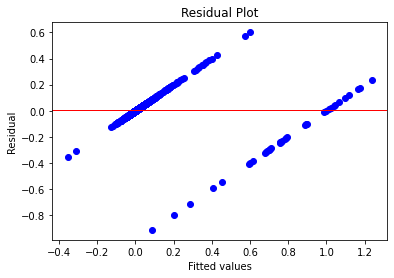

In [ ]:
# Residual plot for the Model 
plt.scatter(y_pred_3, residuals, color='blue')
plt.ylabel('Residual')
plt.xlabel('Fitted values')
plt.title('Residual Plot')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

Most of the residuals value are concentrated near the line of best fit. Which is good for the model.

In [ ]:
# Residual mean
residuals.mean()

0.007388978667828876

##### 5.0.7.1 Computing the Critical Value 

In [ ]:
# Use bartlett's test. 
# The test establishes as a null hypothesis that the variance is equal for all datapoints
# and the Ha hypothesis that the variance is different for at least one pair of datapoints
import scipy.stats as stats
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred_3, residuals)
print("Test result:", test_result)
print("P-value:", p_value)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred_3)-1
print(f"The degree of freedom is: {degree_of_freedom}")

# Probability
probability = 1 - p_value
print(f"The probability value is: {probability}")

# Critical Value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(f"The critical value is: {critical_value}")

if (test_result > critical_value):
  print("The variances are unequal! Reasses the Model!")
else:
  print("The variances are homogeneous! The model is good for consideration")

Test result: 254.13693373067352
P-value: 3.2552157562105296e-57
The degree of freedom is: 815
The probability value is: 1.0
The critical value is: inf
The variances are homogeneous! The model is good for consideration


The Hypothesis were:
Ho:Null Hypothesis: Patient's symptoms doesn't indicate that the patient has hypothyroid.

Ha:Alternate Hypothesis:Patient's symptoms indicate that the patient has hypothyroid.

Significance level
The significance level is set at alpha = 0.05

Having a p-value of 3.2552157562105296e-57, which is less than the alpha value of 0.05, it is clear that the null hypothesis is rejected and alternate hypothesis accepted. From the polynomial regression and the chi2 square test, we can conclude that patients symptoms indicate that the patient has hypothyroid.

Having homogeneous variances is a sufficient confirmation that we can be comfortable with the results for predicting whether the established predictor variables determine hypothyrodism or not. 

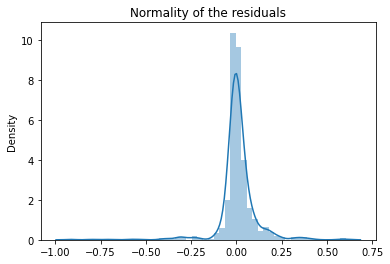

In [ ]:
#Distribution of error terms
residuals_plot = sns.distplot(residuals,kde=True)
residuals_plot = plt.title('Normality of the residuals');

From the residual plot above, it is evident that the data points of our predictive model is highly concentrated along the line of best fit. which is a good sign for a predictive model. The error from the point to the line of best fit is very minimal.

### 5.1 Logistic regression model

In [ ]:
X1 = variables_df[['age',	'sex',	'goitre',	'TSH_measured',	'TSH',	'T3',	'T4U','FTI',	'TBG']].values
y1 = variables_df['status'].values

# Fit the model
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state=42)

In [ ]:
# Import the logistic regression model
from sklearn.linear_model import LogisticRegression

# Fit the model
LogReg = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
LogReg.fit(X1_train, y1_train)

# Using our model to make a prediction
#
y1_pred = LogReg.predict(X_test)

In [ ]:
# Evaluating the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y1_test, y1_pred)
confusion_matrix

array([[774,   5],
       [  7,  30]])

### 6.0 Support Vector Machine

#### 6.0.1Visualize the Model 

In [ ]:
# Preview the dataframe columns
updated_df.columns

Index(['status', 'age_group', 'age', 'sex', 'pregnant', 'sick', 'tumor',
       'lithium', 'goitre', 'TSH_measured', 'TSH', 'T3_measured', 'T3',
       'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI',
       'TBG_measured', 'TBG'],
      dtype='object')

In [ ]:
#Importing the necessary packages and libaries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

# Set the X and y labels
# X = updated_df[["TSH", "FTI", "TT4"]].values
X = updated_df[['status', 'age_group', 'age', 'sex', 'pregnant', 'sick', 'tumor',
                'lithium', 'goitre', 'TSH_measured', 'TSH', 'T3_measured', 'T3',
                'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI',
                'TBG_measured', 'TBG']].values

y = updated_df['status'].values

#fitting the model
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 42)

linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

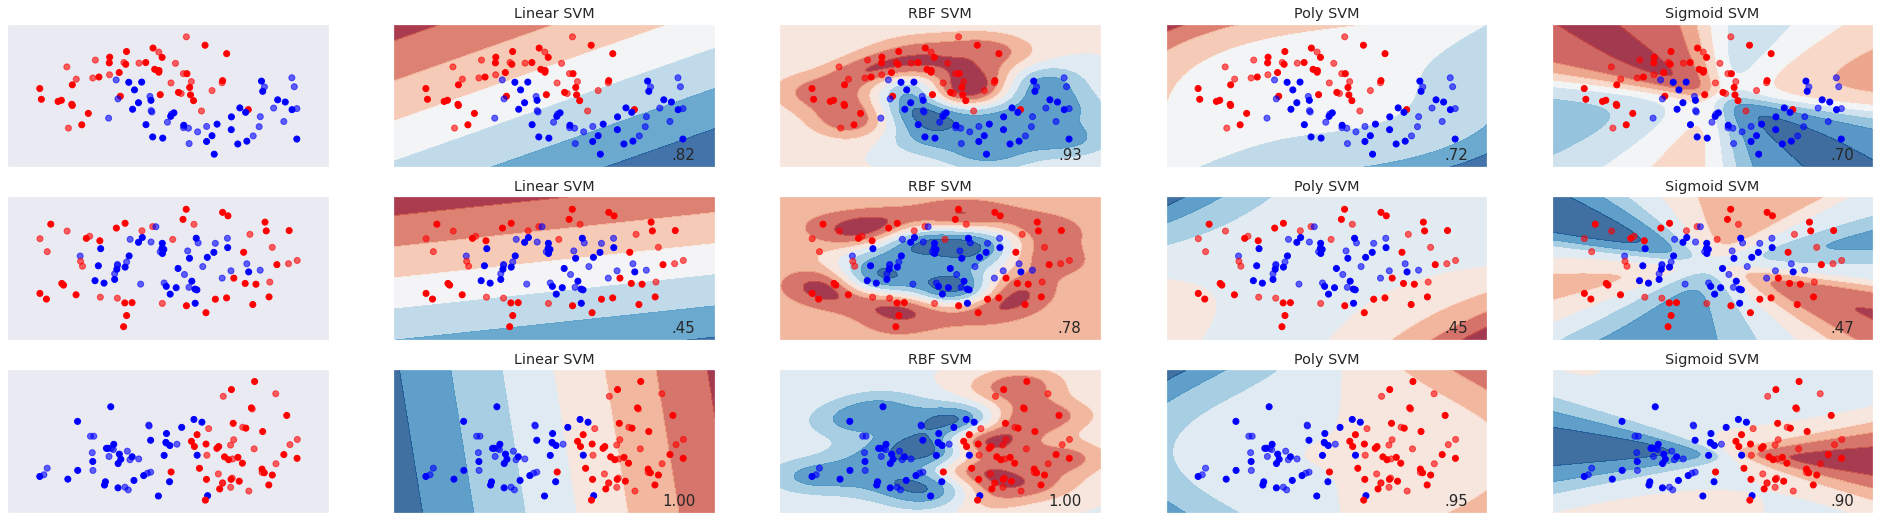

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.svm import SVC

h = .02  # step size in the mesh

names = ["Linear SVM", "RBF SVM", "Poly SVM", "Sigmoid SVM"]
classifiers = [
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    SVC(kernel="poly", C=0.025),
    SVC(kernel="sigmoid", gamma=2)]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

It is easier to draw a line of best fit on the last row of options with Linear SVM and RBF at 100% and Poly SVM at 95% and lastly Sigmid SVM at 90%. The differences between whether a patients has hypothyroidism is well differentiated on the stated option and the difference between the two separate variables is high. 

Build The Model

In [ ]:
# importing required libraries
from sklearn.svm import SVC
# I will use the first 3 features that have the highest importance as my matrix of features x and the y will be the status
x = updated_df[["TSH", "FTI", "TT4"]].values
y = updated_df['status'].values

In [ ]:
# I will create a list of the different kernels im goinng to compare, for loop to get the accuracies of the different kernels
polynomial = SVC(kernel = 'poly')
linear = SVC(kernel = 'linear')
rbf = SVC(kernel = 'rbf')

# Putting the models into one list 
classifier = [polynomial, linear, rbf]

#creating a list of the classifier names which we will use in the for loop
classifier_name = ['Polynomial', 'Linear', 'rbf']

# so now we will use a for loop to iterate through the models and get the accuracies of each model
# You can use zip to iterate over multiple objects at the same time. zip returns tuples that can be unpacked as you go over the loop.
for model, name in zip(classifier, classifier_name):
  
  #Splitting into training and test set 
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

  #Splitting into training and test set 
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
  
  # Feature Scaling
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  x_train = sc.fit_transform(x_train)
  x_test = sc.transform(x_test)

  #Training the SVM model on the Training set
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)

  #getting the accuracy of the model
  from sklearn.metrics import accuracy_score
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)

  from sklearn.metrics import f1_score
  from sklearn.metrics import fbeta_score
  # Printing out the accuracy
  print("The accuracy score for", name, "is", accuracy)
  print("The f1 score is:", f1_score(y_test, y_pred))
  print("The fbeta score is:", fbeta_score(y_test, y_pred, beta = 0.5)) 
  print("\n")

The accuracy score for Polynomial is 0.9816176470588235
The f1 score is: 0.782608695652174
The fbeta score is: 0.8737864077669902


The accuracy score for Linear is 0.96875
The f1 score is: 0.5641025641025641
The fbeta score is: 0.7333333333333333


The accuracy score for rbf is 0.9834558823529411
The f1 score is: 0.8
The fbeta score is: 0.9090909090909091




The main problem with the F1 score is that it gives equal weight to precision and recall. We might sometimes need to include domain knowledge in our evaluation where we want to have more recall or more precision. To solve this, we can do this by creating a weighted F1 metric as below where beta manages the tradeoff between precision and recall.

From the above metrics we can see that both Polynomial(98.26%) and RBF(98.35%) have high accuracies and high f1 and fbeta scores compared to Linear(96.88%), so we can say that Linear should not be used in this modelling for it has a low percentage amongst the other three.

#### 6.0.2 Hyperparameter Tuning and cross Validation

In [ ]:
SVC()

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#matrix of features x and the dv
x = updated_df[["TSH", "FTI", "TT4"]].values
y = updated_df['status'].values


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


# Training the Kernel SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
# Getting the variance in the accuracies so we will print the sd
print("Standard Deviation of the cross validation: {:.2f} %".format(accuracies.std()*100))
print("\n")

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
#we are going to have two dictionaries in the list because the gamma parameter can only be used with a rbf kernel 
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3,
                                                                       0.4, 0.5, 0.6,
                                                                       0.7, 0.8, 0.9]},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['poly'], 'degree': [1, 2, 3], 'gamma': [0.1,0.2,0.3,
                                                                                             0.4,0.5,0.6,
                                                                                             0.7,0.8,0.9]}]

#finding the accuracy on the 10 test folds
#the n_jobs is to set all your process to run the grid search
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy',
                           cv = 10, n_jobs = -1)
grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("ACCURACY AFTER 10 TEST FOLDS AND THE BEST PARAMETERS")
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Accuracy: 98.11 %
Standard Deviation of the cross validation: 0.75 %


ACCURACY AFTER 10 TEST FOLDS AND THE BEST PARAMETERS
Best Accuracy: 98.63 %
Best Parameters: {'C': 1, 'gamma': 0.8, 'kernel': 'rbf'}


From the above output we can see that the standard deviation is 0.78% which represents the variance of the accuracies. Before applying any parameter tuning the rbf gave an accuracy of 98.11%

After cross-validation on 10 test folds the best accuracy obtained was 98.63%

The best hyperparamerters are:

   1. C(Regularization Parameter) = 1
   2. Gamma(Kernel Coeff) = 0.8
   3. Kernel(kernel type) = RBF

#### 6.0.3 Remodelling with the Hyperparameters

In [ ]:
#matrix of features x and the dv
x = updated_df[["TSH", "FTI", "TT4"]].values
y = updated_df['status'].values


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


# Training the Kernel SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', C = 1, gamma = 0.8)
classifier.fit(x_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.8, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Predicting the test set results
y_pred = classifier.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix

# the confusion matrix is evaluated in the test set
cm = confusion_matrix(y_test, y_pred)  
print(cm)

# Find the accuracy of the test set predictions
print(accuracy_score(y_test, y_pred)) 

[[773   6]
 [  5  32]]
0.9865196078431373


After applying the hyperparameter tuning, the accuracy increased from 98.63 to 98.65%. Out of 816 prdictions, 773 and 32 will be 98.65% True values while 5 and 6 will be the False predictions.

### 7.0 Challenging the solution
I will try to challenge the findings using quantile regression by trying to understand outcomes that are non-normally distributed and that have nonlinear relationships with predictor variables.

#### 7.0.1 Quantile Regression

When to use quantile Regression:
1. To estimate the median, or the 0.25 quantile, or any quantile 
2. Key assumption of linear regression is not satisfied
3. When they are Outliers in the data
4. residuals are not normal 
5. Increase in error variance with increase in outcome variable

In [ ]:
# Declaring our X and y variables
X2 = variables_df[['age',	'sex',	'goitre',	'TSH_measured',	'TSH',	'T3',	'T4U','FTI',	'TBG']].values
y2 = variables_df['status'].values

# Apply LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
lda2 = LDA()
X_lda = lda2.fit_transform(X2,y2)


# split the data into train and test set
X2_train, X2_test, y2_train, y2_test = train_test_split(X_lda, y2, random_state=42,test_size=0.3)


# Finding the regression coefficients for the conditioned median, 0.5 quantile

import statsmodels.formula.api as smf

mod = smf.quantreg('status ~ sex + goitre + TSH_measured + TSH + T3 + T4U + FTI + TBG', variables_df)
res = mod.fit(q=.5)

# Print the summary of the model
#
print(res.summary())
# The intercept is -0.0002 
# These are the parameters for the 0.5th quantile for y.

                         QuantReg Regression Results                          
Dep. Variable:                 status   Pseudo R-squared:              0.06583
Model:                       QuantReg   Bandwidth:                    0.001474
Method:                 Least Squares   Sparsity:                     0.007477
Date:                Sat, 31 Jul 2021   No. Observations:                 2717
Time:                        07:55:59   Df Residuals:                     2707
                                        Df Model:                            9
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0002      0.000     -0.434      0.665      -0.001       0.001
sex[T.1]         0.0002      0.000      0.934      0.351      -0.000       0.000
sex[T.0]         0.0006      0.001      0.630      0.529      -0.001       0.002
goitre           0.0007      0.000      1.

In [ ]:
# plotting Models for other Quantiles
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['TSH'], res.params['T4U'], res.params['T3'], res.params['TBG']] 
               + [res.conf_int().loc['TSH'].tolist(), res.conf_int().loc['T4U'].tolist(), res.conf_int().loc['T3'].tolist(), res.conf_int().loc['TBG'].tolist()])

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'TSH_coef', 'T4U_coef', 'T3_coef','TBG_coef', 'TSH_bound', 'T4U_bound', 'T3_bound', 'TBG_bound'])
params

qt  ...                                          TBG_bound
0  0.1  ...  [-1.7577263474862403e-09, 3.5834011073716092e-09]
1  0.2  ...   [-2.0709677485378715e-09, 7.729743289112278e-09]
2  0.3  ...     [-5.88520197272618e-09, 2.547044230487992e-08]
3  0.4  ...   [-9.943902835190739e-06, 1.1220898349183147e-05]
4  0.5  ...   [-2.0673451069387398e-05, 2.076926572388382e-05]
5  0.6  ...  [-1.5023793074441686e-05, 1.5041107807351939e-05]
6  0.7  ...   [-2.1100142892609513e-05, 2.110413697955308e-05]
7  0.8  ...    [-4.680739576063662e-05, 4.680665686269711e-05]
8  0.9  ...    [-9.586090492600768e-05, 9.585805564737065e-05]

[9 rows x 10 columns]

In [ ]:
# Plot the changes in the quantile coeffiecients
params.plot(x = 'qt', y = ['TSH_coef', 'T4U_coef', 'T3_coef','TBG_coef', 'TSH_bound', 'T4U_bound', 'T3_bound', 'TBG_bound'],
            title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'])
plt.show()


From the grapp above, TBG and T3 variables seem to have a linear relationship while T4U appears to be affect by the TSH variable between the 30th and 70th quantile. According to an article found on [National Centre for Biotechnology Information](https://www.ncbi.nlm.nih.gov/books/NBK544274/) website, in the presence of TBG, there would be only a 10% drop in T4 and a 40% drop in T3.

### 8.0 Conclusion


The independent variables that dertermine whether a patient has hypothyroidism or not were FTI, TSH, TT4 and T4U. Age, sex and TBG had little influence in establishing if a patient had hypothyroidism. TBG didn't appear to have any impact on determining whether a patient has hypothyroid or not is because it had almost 90% of null values.



### 9.0 Did we have the right data:
Some how yes we did have the right data. The two challenges experienced were that the data didn't have details of the column descriptions such as unit of measure. it was difficult to compare the values in the data set with the normal ranges of the predictor variables in order to establish if the figures are outliers, anomalies or correct. The other challenge was that some variables such as TBG missed a great percentage of the values. Thus I could establish if it had an impact in determining whether patient's had hypothyroid. However, despite that hiccup, I was able to use the provided data and established that FTI, TSH, TT4 and T4U had a greater influence in establishing whether a patient has hypothyroidism.



#### 9.0.1 Challenging the Solution
I did challenge the solution by trying to establish how the non linear independent variables are towards the dependent/target variable using quantile regression and found out that TBG and T3 variables seem to have a linear relationship while T4U appears to be affect by the TSH variable between the 30th and 70th quantile.

According to an article available on [National center for Boitechnology Information](https://www.ncbi.nlm.nih.gov/books/NBK544274/)website, Thyroxine-binding globulin (TBG) is one of three major transport proteins, which are primarily responsible for binding to and transporting thyroid hormones to the necessary tissues.  The other two serum transport proteins include transthyretin and human serum albumin.  While there are higher amounts of albumin in serum, TBG has a greater affinity to thyroxine (T4). Abnormalities in the functionality and amount of TBG can cause variations in the total amount of T4 in the serum, but not in the amount of bioactive free T4.  Since the amount of free T4 circulating in the serum remains the same, deficiency in thyroxine-binding globulin often does not lead to adverse metabolic effects seen in an individual with abnormal thyroid hormone levels. However, it can cause errors in the interpretation of thyroid hormone labs, which can ultimately lead to inappropriate treatment.

This might be the reason why the values for TBG were not available in the dataset. There is therefore a need for establishing what effect this variable has in patients with thyroid issues.

### 10.0 Recommendation

There's is need to ensure that tests for Thyroxine-binding globulin (TBG) are interprated correctly to avoid misdiagnosis of thyroid issues. The TBG values to be included in future model for prediction as to whether it is determinant in establishing if a patient has hypothyroid or not. 